 # METASTATIC CANCER DIAGNOSIS ANALYSIS:

# IMPORTING NECESSARY LIBRARIES

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# LOADING THE DATASET

In [2]:
# train dataset
train = pd.read_csv(r"/kaggle/input/widsdatathon2024-challenge2/train.csv")
df = pd.DataFrame(train)

In [3]:
# test dataset
test = pd.read_csv(r"/kaggle/input/widsdatathon2024-challenge2/test.csv")
df = pd.DataFrame(test)

test

patient_id patient_race          payer_type patient_state  patient_zip3  \
0         730681          NaN          COMMERCIAL            LA           713   
1         334212        Black                 NaN            NC           283   
2         571362          NaN          COMMERCIAL            TX           794   
3         907331          NaN          COMMERCIAL            TN           373   
4         208382        Asian                 NaN            WA           980   
...          ...          ...                 ...           ...           ...   
5641      649011        White                 NaN            CO           800   
5642      869024          NaN          COMMERCIAL            GA           300   
5643      304800        Asian          COMMERCIAL            CA           914   
5644      267406        White  MEDICARE ADVANTAGE            CA           906   
5645      873886        White  MEDICARE ADVANTAGE            NY           122   

         Region            Division  patient_age patient_gender    bmi  ...  \
0         South  West South Central           55              F    NaN  ...   
1         South      South Atlantic           60              F  40.00  ...   
2         South  West South Central           54              F  32.33  ...   
3         South  East South Central           63              F  27.07  ...   
4          West             Pacific           62              F    NaN  ...   
...         ...                 ...          ...            ...    ...  ...   
5641       West            Mountain           63              F    NaN  ...   
5642      South      South Atlantic           57              F  40.00  ...   
5643       West             Pacific           44              F    NaN  ...   
5644       West             Pacific           66              F  31.79  ...   
5645  Northeast     Middle Atlantic           73              F    NaN  ...   

     Average of Mar-18 Average of Apr-18 Average of May-18 Average of Jun-18  \
0                62.21             62.23             78.34             81.96   
1                48.63             58.14             77.26             80.05   
2                57.82             59.95             77.79             82.45   
3                47.57             53.50             71.31             75.20   
4                41.02             46.25             56.92             57.88   
...                ...               ...               ...               ...   
5641             43.24             48.85             61.47             72.59   
5642             50.20             56.76             72.53             77.56   
5643             59.25             62.98             63.26             67.57   
5644             60.26             64.84             64.40             69.37   
5645             31.12             39.02             59.89             63.54   

     Average of Jul-18  Average of Aug-18  Average of Sep-18  \
0                83.58              82.22              80.20   
1                82.88              82.09              78.85   
2                82.44              80.77              72.16   
3                76.96              75.78              74.87   
4                66.16              65.21              57.52   
...                ...                ...                ...   
5641             74.94              72.44              67.41   
5642             78.82              77.39              78.71   
5643             76.04              75.15              71.05   
5644             78.29              77.42              73.15   
5645             71.79              70.95              63.01   

      Average of Oct-18  Average of Nov-18  Average of Dec-18  
0                 69.73              53.14              51.34  
1                 64.60              50.57              48.10  
2                 59.31              48.25              42.13  
3                 61.06              44.31              42.83  
4                 49.53           

# Missing Data

TEST DATASET

In [4]:
test = test.applymap(lambda x:np.nan if x=='nan' else x)

In [5]:
#lets see how much are the missing_vaues in the dataset
RED,BOLD,RESET='\033[91m','\033[1m','\033[0m'
total_missing=test.isnull().sum().sum()
total_cells=test.size
missing_percentage=(total_missing/total_cells)*100
print(f"the total number of missing values are {BOLD}{RED}{total_missing}{RESET},\
which is {BOLD}{RED}{missing_percentage:.2f}%{RESET} of total data.")

the total number of missing values are 19247,which is 2.26% of total data.


In [6]:
#lets check the count and percentage of missing values in the data
missing_info=test.isna().mean()*100
missing_info=missing_info[missing_info>0].sort_values(ascending=False)
for column,missing_percentage in missing_info.items():
    print(f"{BOLD}{column}{RESET} has {BOLD}{RED}{test[column].isna().sum()}{RESET} missing values,which is {BOLD}{RED}{missing_percentage:.2f}%{RESET} of the column,")

metastatic_first_novel_treatment has 5639 missing values,which is 99.88% of the column,
metastatic_first_novel_treatment_type has 5639 missing values,which is 99.88% of the column,
bmi has 3941 missing values,which is 69.80% of the column,
patient_race has 2785 missing values,which is 49.33% of the column,
payer_type has 785 missing values,which is 13.90% of the column,
Average of Apr-14 has 95 missing values,which is 1.68% of the column,
Average of Jun-14 has 79 missing values,which is 1.40% of the column,
Average of Oct-13 has 27 missing values,which is 0.48% of the column,
Average of Dec-18 has 23 missing values,which is 0.41% of the column,
Average of Mar-14 has 17 missing values,which is 0.30% of the column,
Average of Jul-18 has 16 missing values,which is 0.28% of the column,
Average of Oct-17 has 15 missing values,which is 0.27% of the column,
Average of Aug-15 has 15 missing values,which is 0.27% of the column,
Average of Sep-13 has 14 missing values,which is 0.25% of the colum

The describe() function is used to generate descriptive statistics that summarize the central tendency, dispersion and shape of a dataset's distribution, excluding NaN values.

In [7]:
test.describe()

patient_id  patient_zip3  patient_age          bmi    population  \
count    5646.000000   5646.000000  5646.000000  1705.000000   5646.000000   
mean   549581.847680    569.824655    58.921537    29.142798  20865.277040   
std    260549.557126    276.824893    13.326813     5.612167  14252.666477   
min    100401.000000    100.000000    18.000000    16.000000    829.520000   
25%    325189.750000    330.000000    50.000000    24.840000   8893.480000   
50%    551142.500000    554.000000    59.000000    28.340000  19154.190000   
75%    773004.000000    836.000000    66.000000    33.140000  30145.890000   
max    999846.000000    997.000000    91.000000    43.700000  71374.130000   

            density   age_median  age_under_10  age_10_to_19      age_20s  \
count   5646.000000  5646.000000   5646.000000   5646.000000  5646.000000   
mean    1826.421314    40.509499     11.123819     12.868130    13.291959   
std     3928.358993     3.983375      1.498752      1.906942     3.226722   
min        0.920000    30.030000      5.220000      6.310000     5.930000   
25%      161.930000    37.130000     10.150000     11.680000    11.020000   
50%      688.010000    40.640000     11.040000     12.920000    12.540000   
75%     1686.320000    42.940000     12.190000     13.890000    14.970000   
max    29851.690000    54.570000     17.680000     24.900000    36.900000   

       ...  Average of Mar-18  Average of Apr-18  Average of May-18  \
count  ...        5639.000000        5646.000000        5646.000000   
mean   ...          46.471807          52.753471          68.065220   
std    ...          12.057043          11.079245           6.304141   
min    ...          14.910000          25.670000          40.580000   
25%    ...          36.440000          43.590000          63.260000   
50%    ...          43.650000          51.200000          66.120000   
75%    ...          58.990000          62.340000          72.690000   
max    ...          71.640000          76.490000          86.570000   

       Average of Jun-18  Average of Jul-18  Average of Aug-18  \
count        5641.000000        5630.000000        5639.000000   
mean           73.188927          77.221172          76.388918   
std             6.539446           5.279963           5.239295   
min            49.620000          57.440000          50.300000   
25%            68.160000          73.272500          72.550000   
50%            71.750000          76.685000          76.330000   
75%            77.920000          80.660000          79.580000   
max            90.660000          96.430000          95.770000   

       Average of Sep-18  Average of Oct-18  Average of Nov-18  \
count        5644.000000        5644.000000        5638.000000   
mean           71.584807          59.669313          46.499769   
std             6.481236           9.311322          12.323264   
min            43.780000          32.020000          14.160000   
25%            67.030000          52.110000          35.635000   
50%            70.900000          58.200000          43.210000   
75%            76.070000          67.880000          55.930000   
max            89.190000          81.460000          76.300000   

       Average of Dec-18  
count        5623.000000  
mean           42.477839  
std            11.295638  
min             4.330000  
25%            33.430000  
50%            39.560000  
75%            51.040000  
max            73.540000  

[8 rows x 140 columns]

# Missing Value Treatment

* we will impute with 
* -999 for numeric column with values above 1% missing
* 'missing' for categorical column with values above 1% missing
* for rest,we will fill with mode for categorical and median for numerical

In [8]:
# Missing Value Treatment
# We will impute with:
# -999 for numeric columns with values above 1% missing
# 'missing' for categorical columns with values above 1% missing
# For the rest, we will fill with mode for categorical and median for numerical

columns_to_fill = ['metastatic_first_novel_treatment_type', 'metastatic_first_novel_treatment', 'patient_race', 'payer_type']
train[columns_to_fill] = test[columns_to_fill].fillna('Missing')
test['bmi'] = test['bmi'].fillna('-999')

categorical_cols = test.select_dtypes(include='object').columns
for col in categorical_cols:
    mode_value = train[col].mode()[0]
    test[col].fillna(mode_value, inplace=True)

numerical_cols = test.select_dtypes(include='number').columns
for col in numerical_cols:
    if col not in ['metastatic_diagnosis_period', 'patient_id']:
        median_value = test[col].median()
        test[col].fillna(median_value, inplace=True)


In [9]:
test['bmi'] = pd.to_numeric(test['bmi'],errors='coerce')

In [10]:
print("test dataset missing values post treatment ",test.isnull().sum().sum())

test dataset missing values post treatment  0


# Outliers

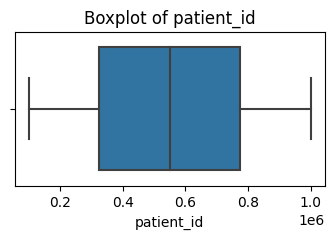

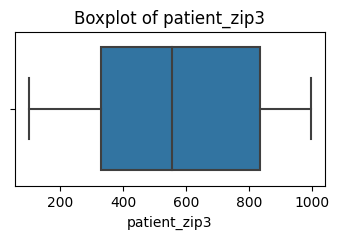

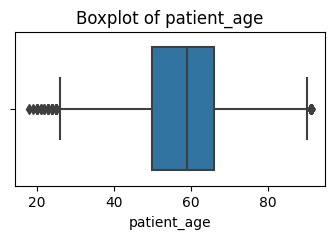

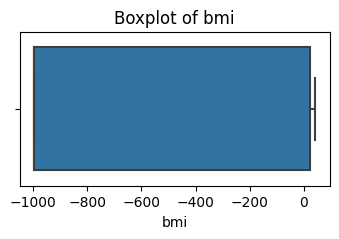

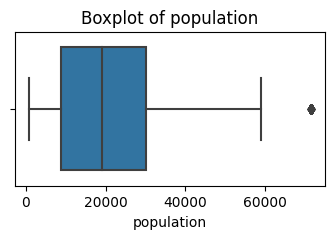

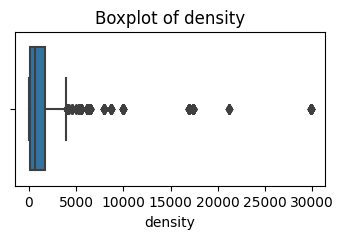

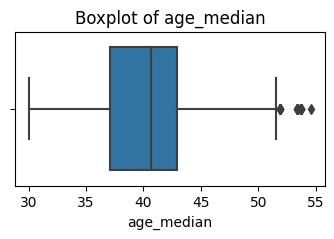

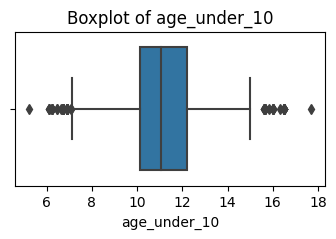

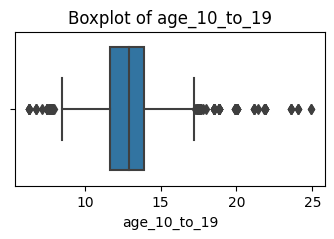

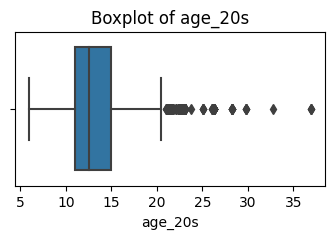

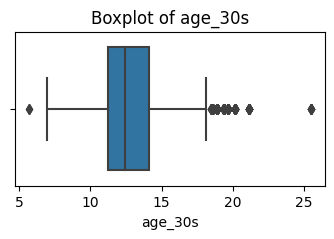

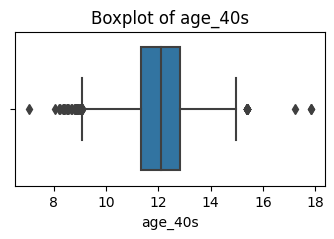

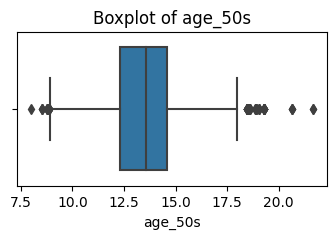

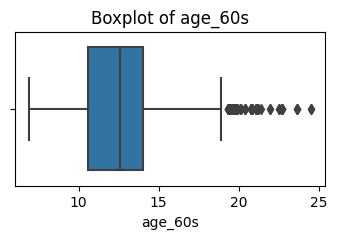

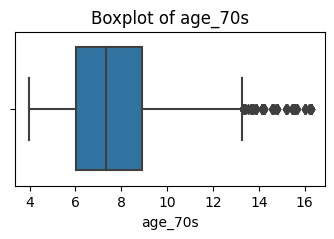

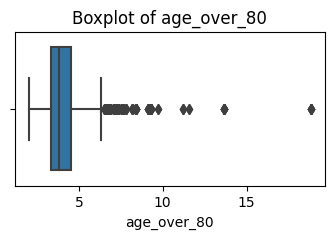

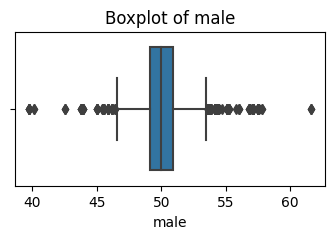

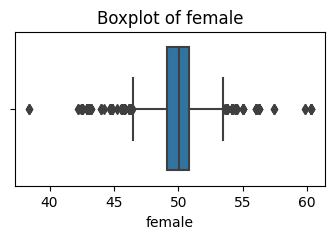

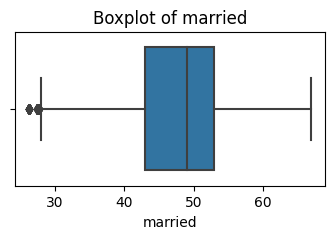

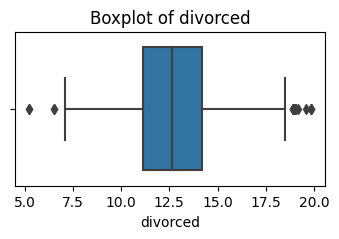

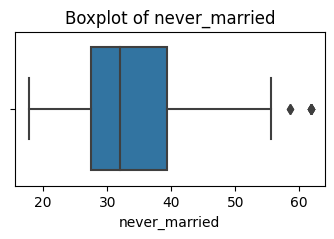

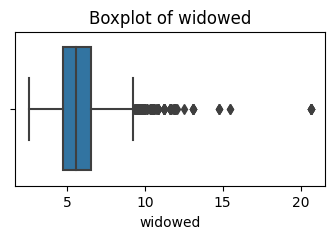

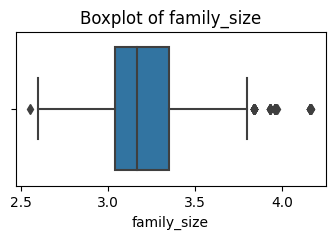

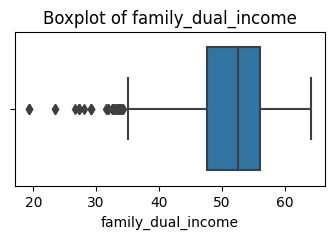

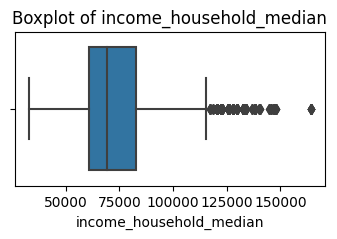

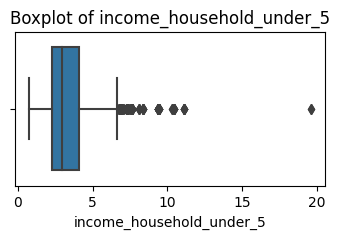

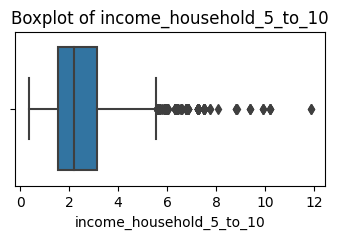

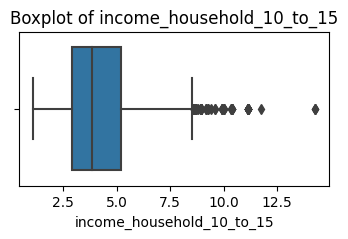

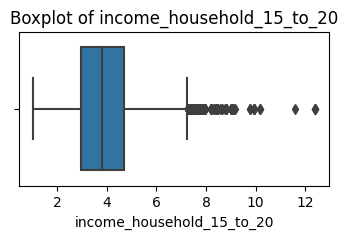

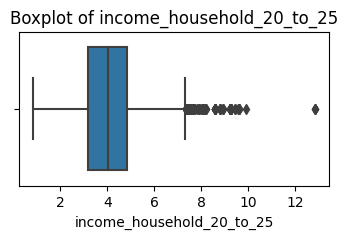

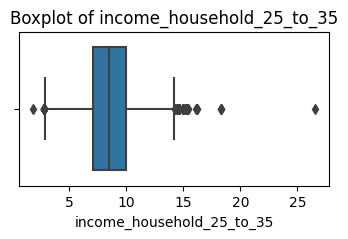

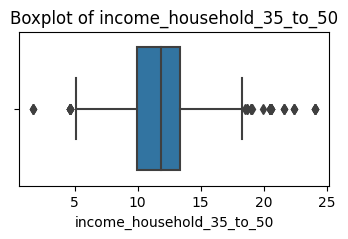

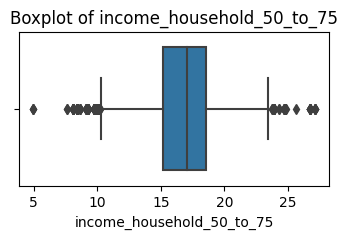

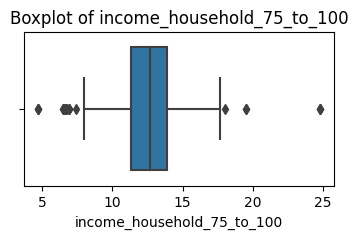

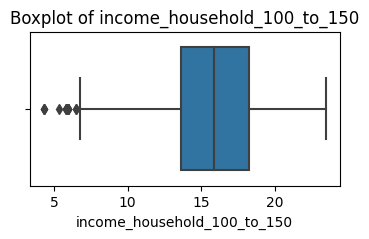

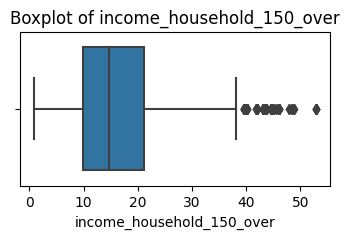

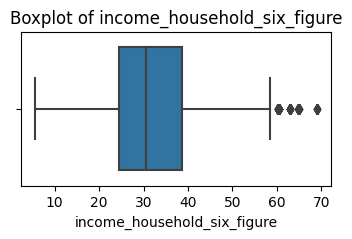

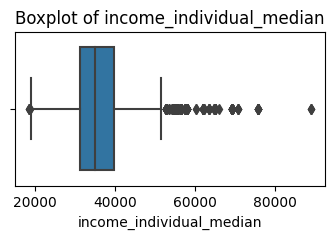

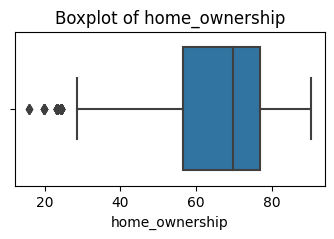

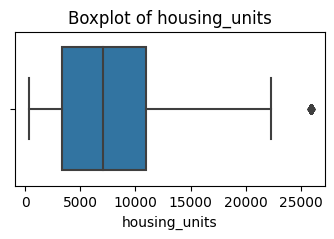

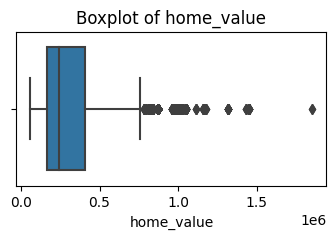

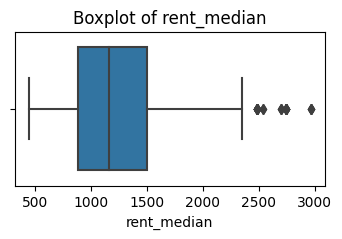

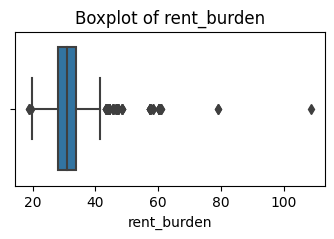

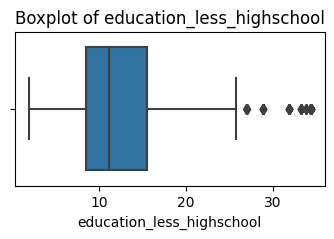

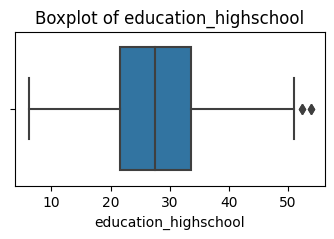

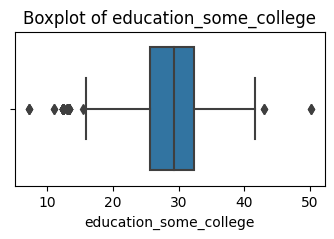

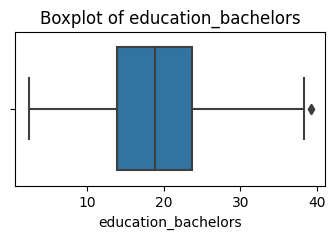

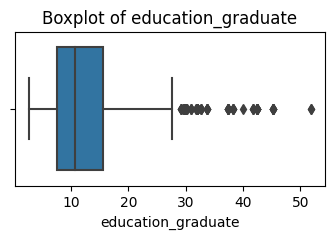

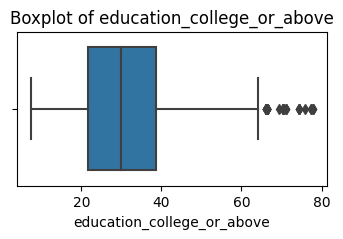

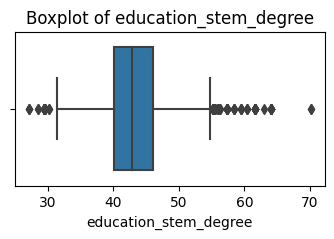

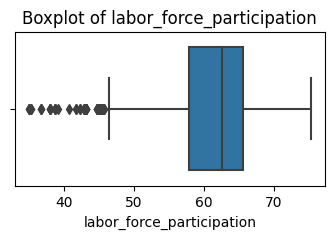

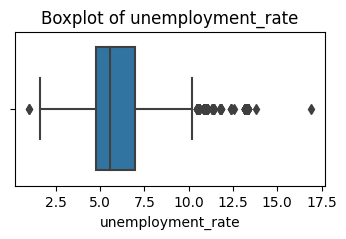

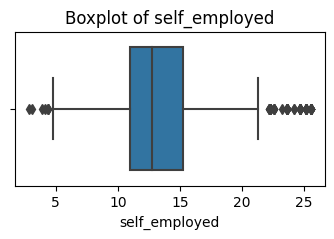

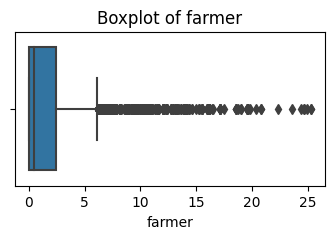

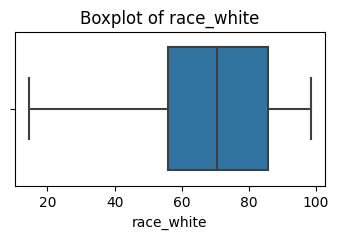

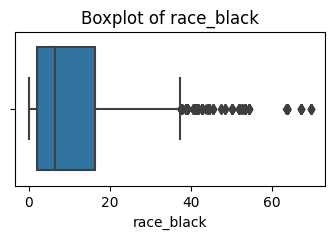

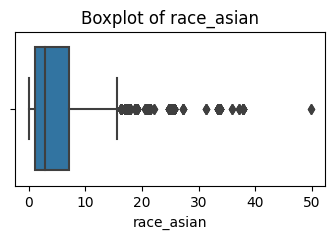

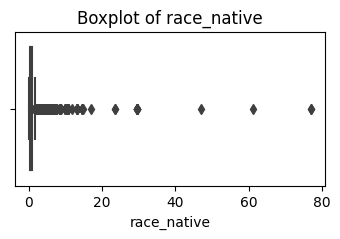

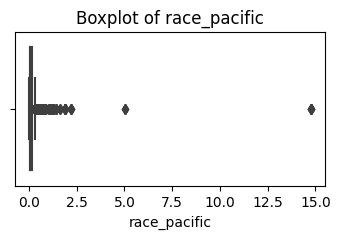

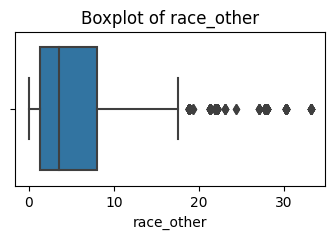

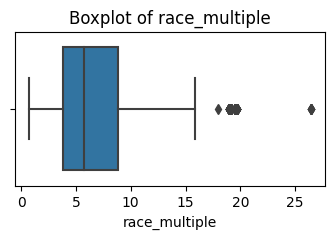

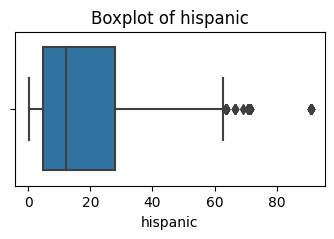

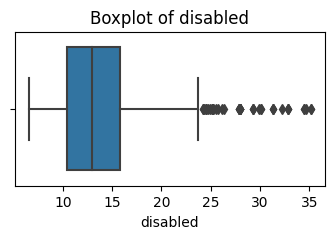

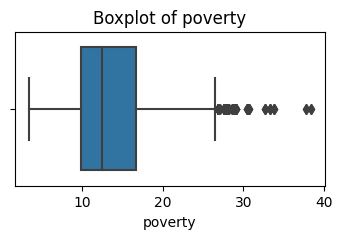

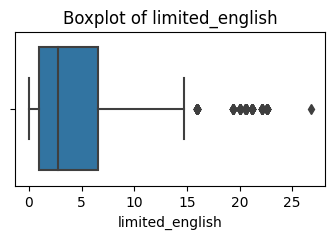

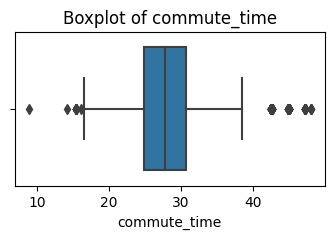

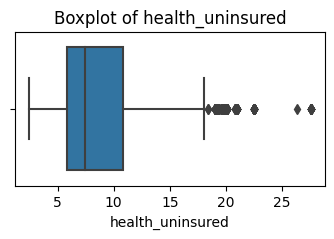

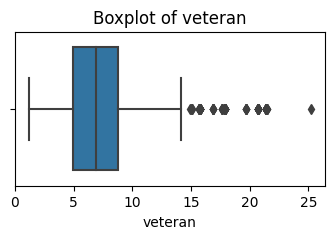

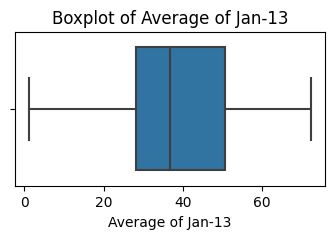

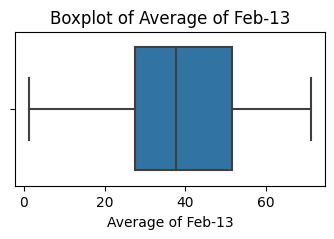

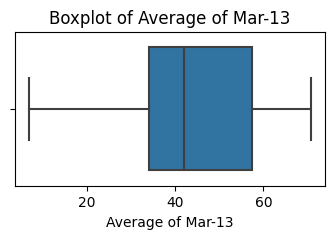

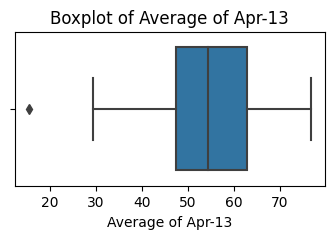

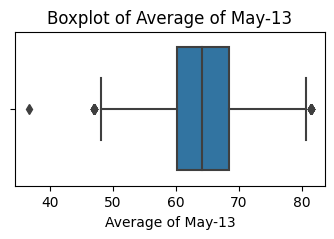

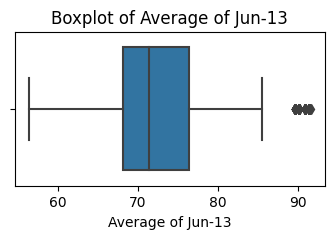

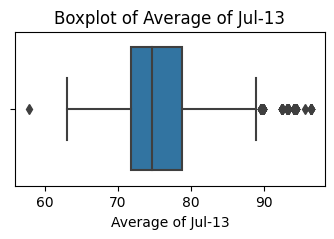

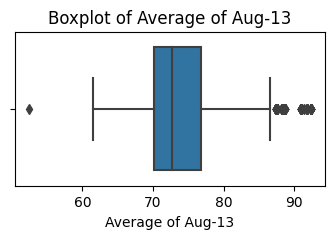

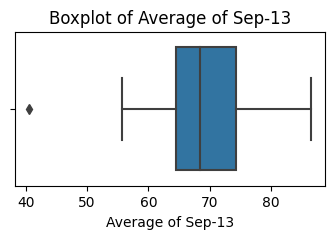

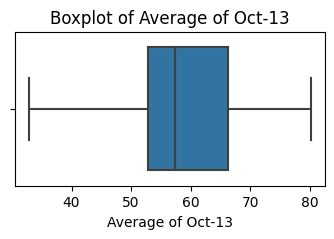

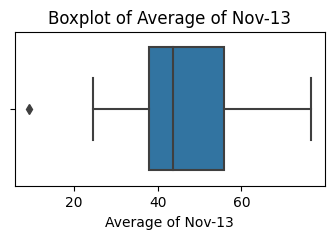

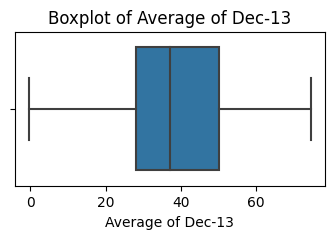

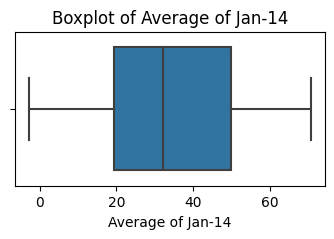

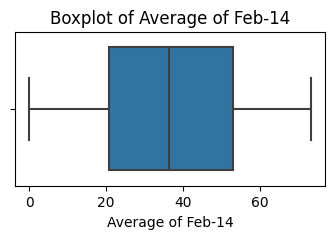

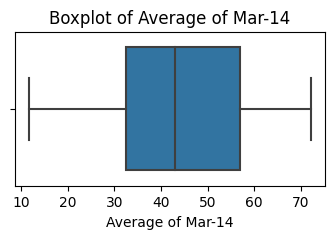

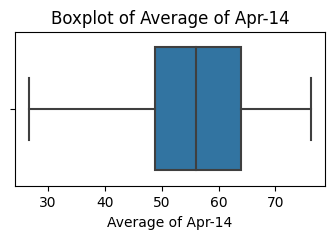

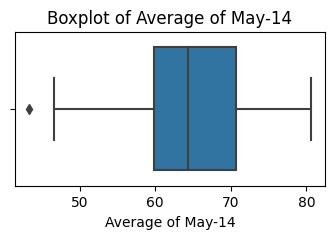

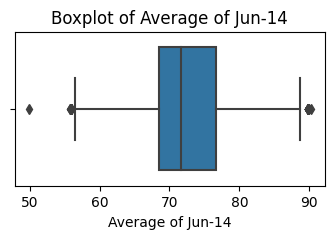

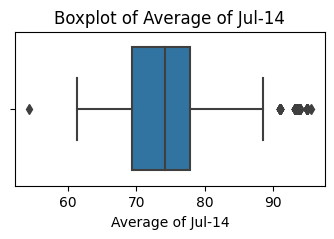

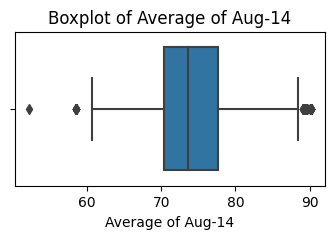

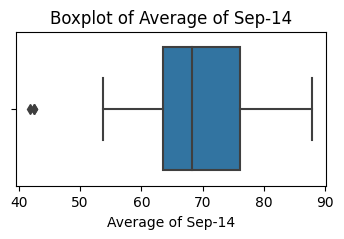

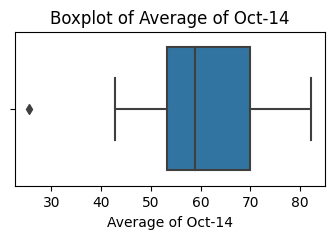

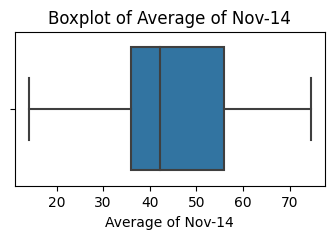

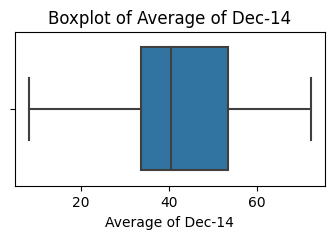

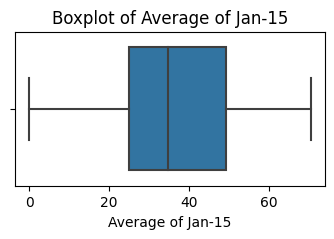

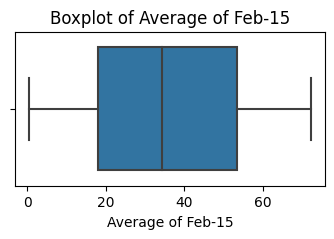

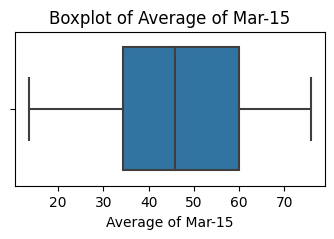

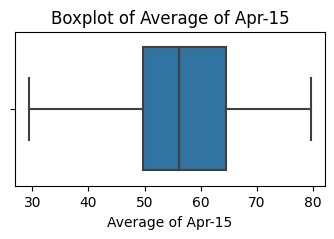

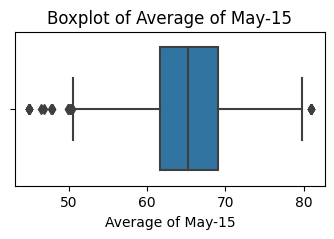

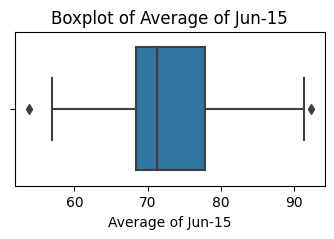

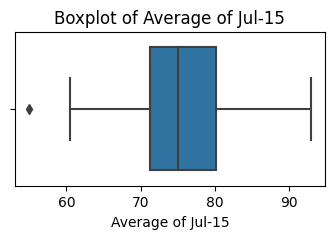

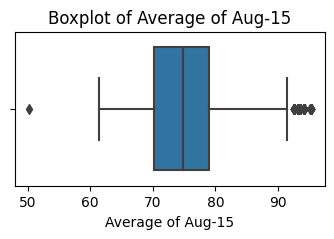

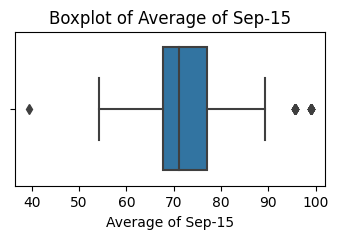

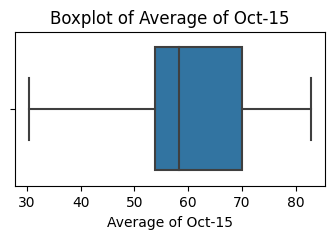

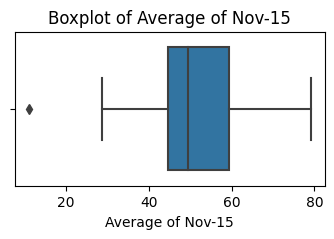

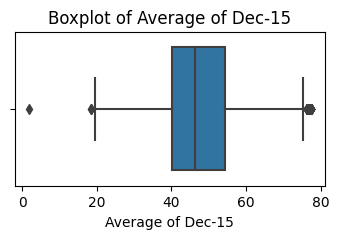

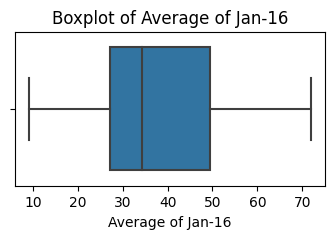

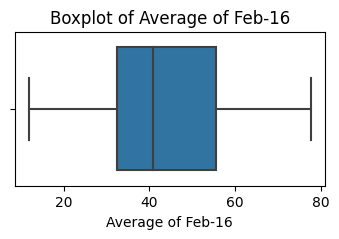

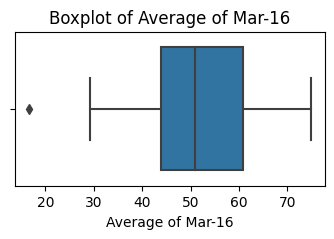

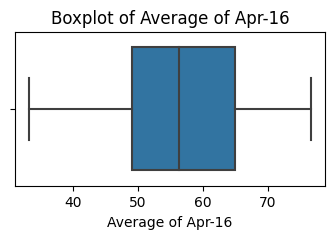

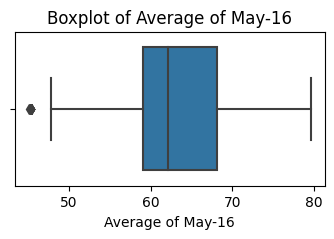

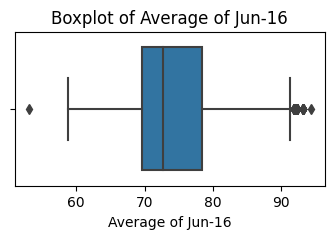

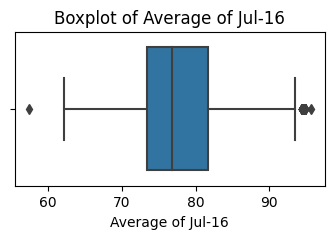

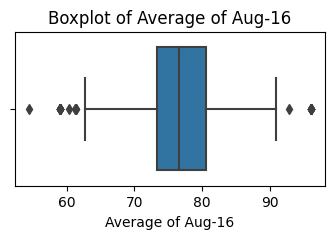

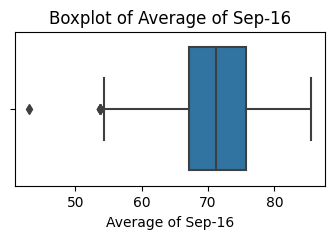

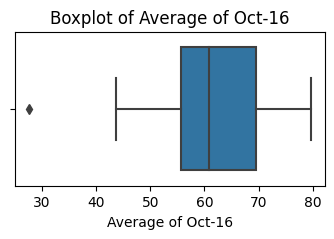

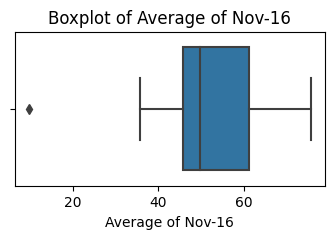

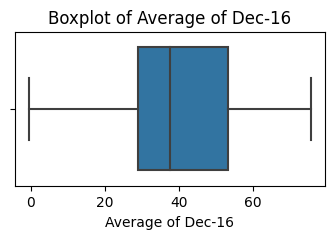

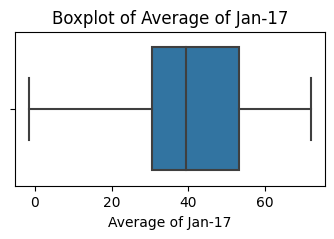

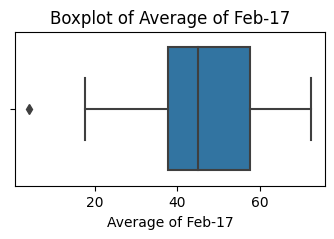

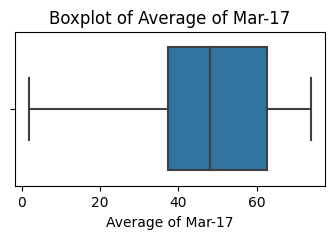

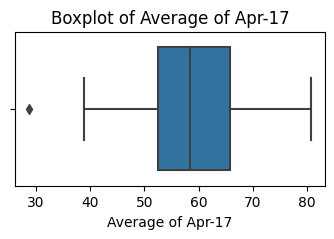

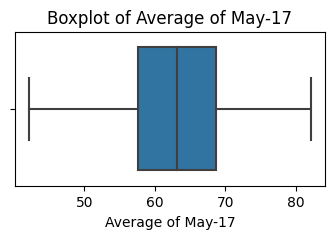

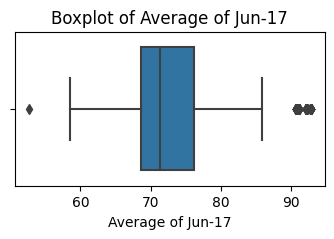

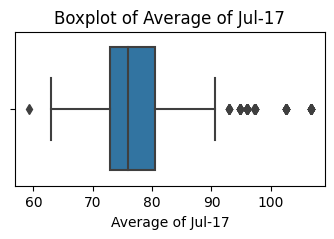

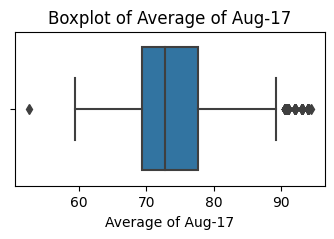

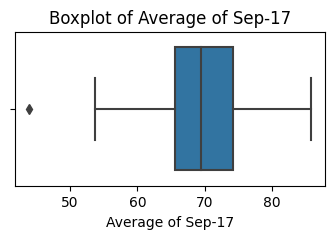

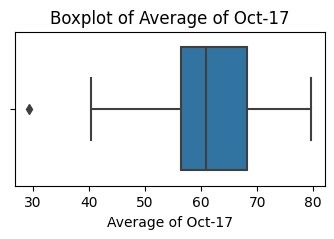

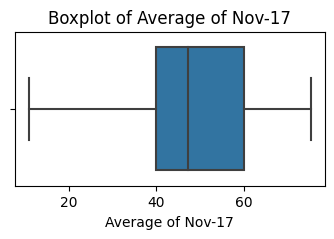

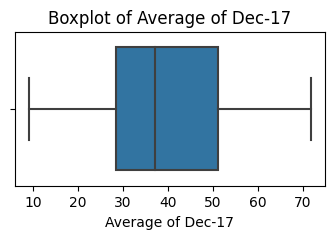

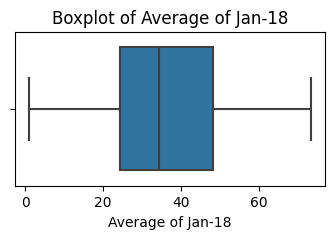

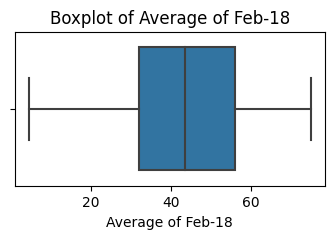

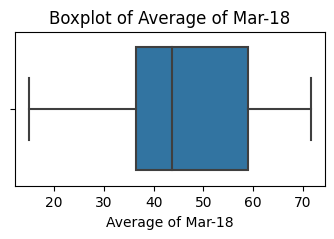

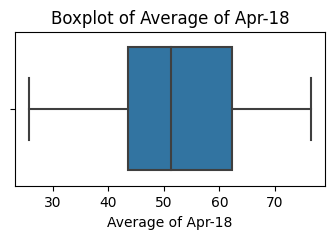

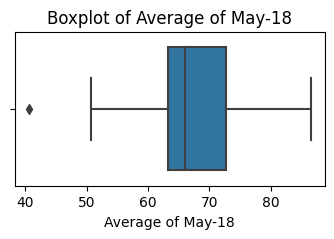

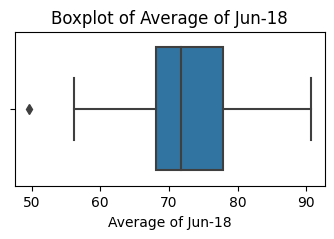

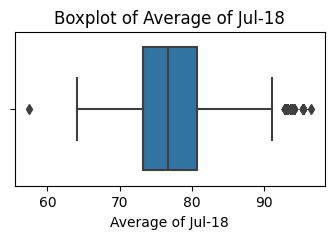

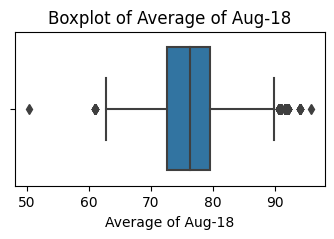

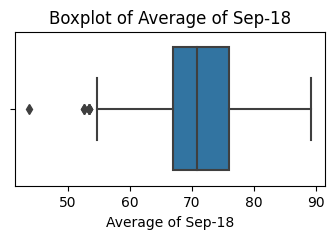

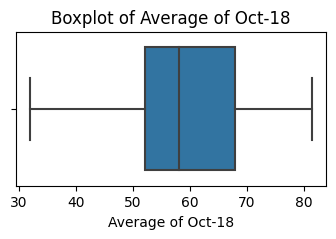

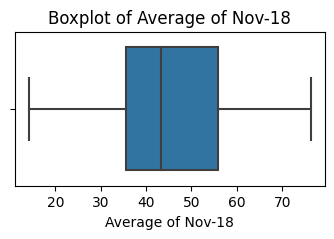

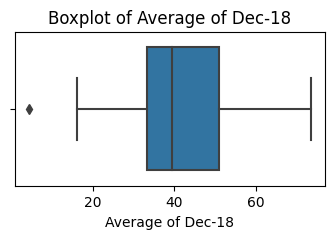

In [11]:
for column in test.columns:
    if pd.api.types.is_numeric_dtype(test[column]):
        plt.figure(figsize=(4, 2))
        sns.boxplot(x=test[column])
        plt.title(f'Boxplot of {column}')
        plt.xlabel(column)
        plt.show()

In [12]:
for column in test.columns:
    if pd.api.types.is_numeric_dtype(test[column]):
        print("Minimium value of ",column,"is",df[column].min())
        print("Mean value of ",column,"is",df[column].mean())
        print("Maximum value of ",column,"is",df[column].max())
        print("-"*75)

Minimium value of  patient_id is 100401
Mean value of  patient_id is 549581.8476797733
Maximum value of  patient_id is 999846
---------------------------------------------------------------------------
Minimium value of  patient_zip3 is 100
Mean value of  patient_zip3 is 569.8246546227417
Maximum value of  patient_zip3 is 997
---------------------------------------------------------------------------
Minimium value of  patient_age is 18
Mean value of  patient_age is 58.9215373715905
Maximum value of  patient_age is 91
---------------------------------------------------------------------------
Minimium value of  bmi is 16.0
Mean value of  bmi is 29.142797653958944
Maximum value of  bmi is 43.7
---------------------------------------------------------------------------
Minimium value of  population is 829.52
Mean value of  population is 20865.27704038257
Maximum value of  population is 71374.13
---------------------------------------------------------------------------
Minimium value of 

# Checking the distribution of data

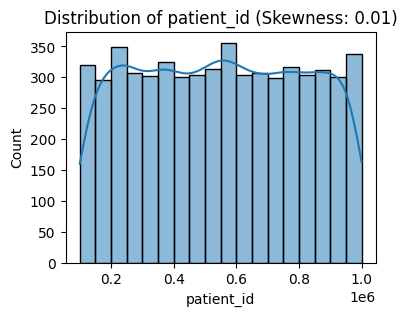

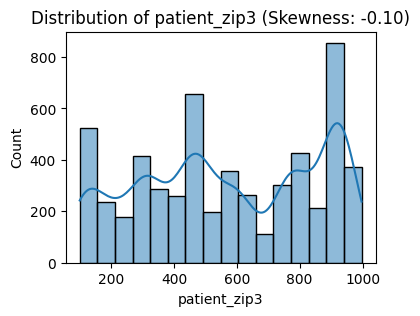

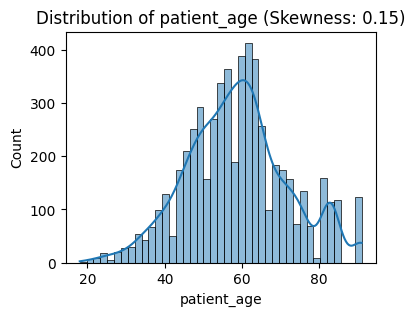

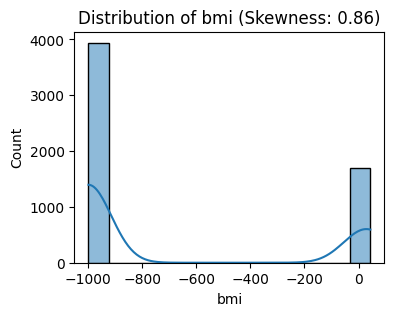

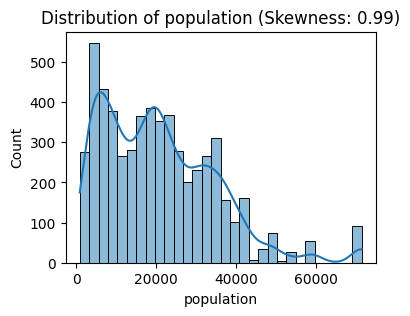

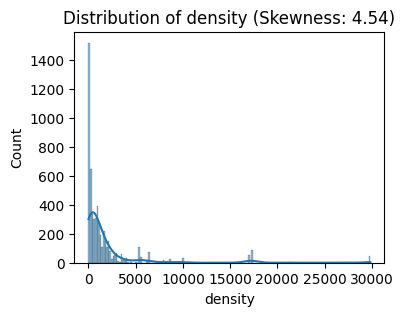

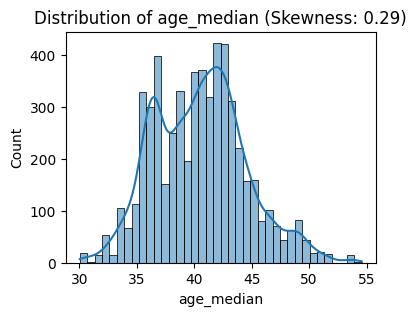

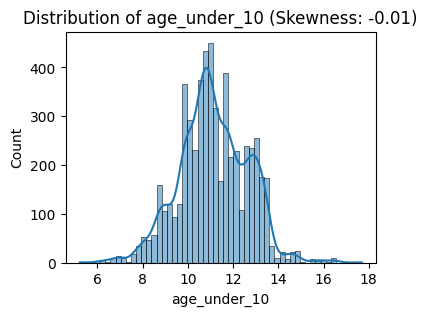

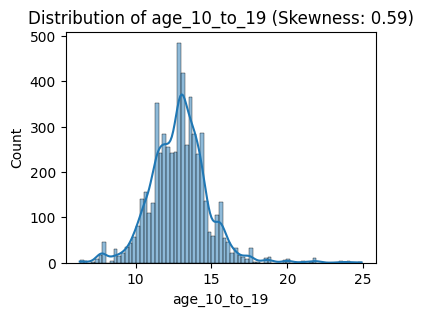

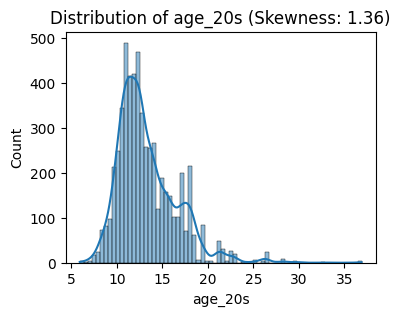

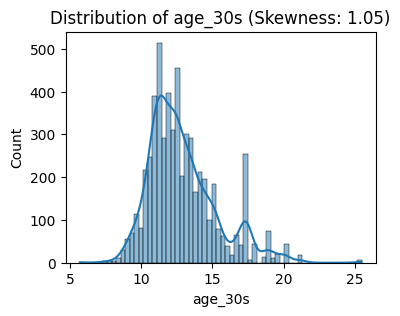

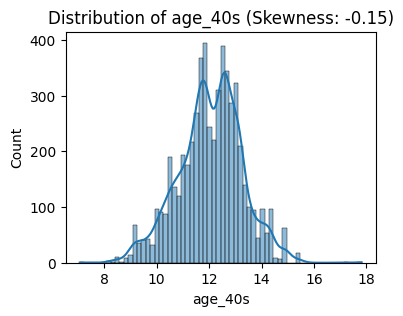

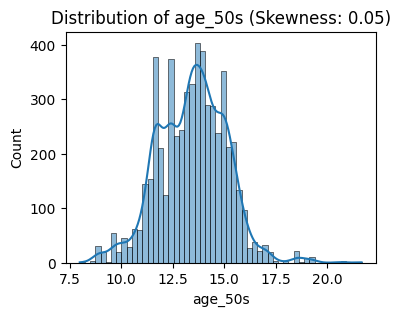

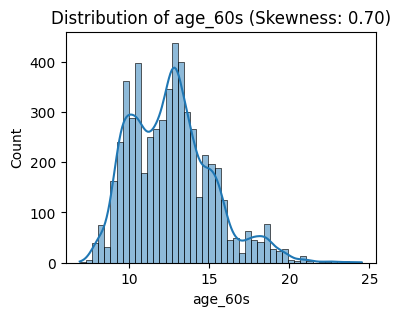

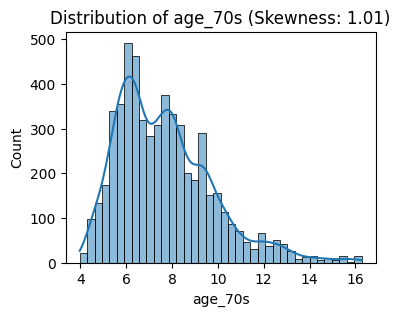

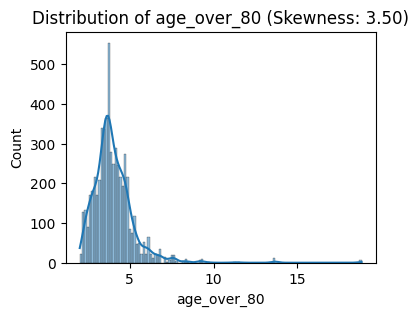

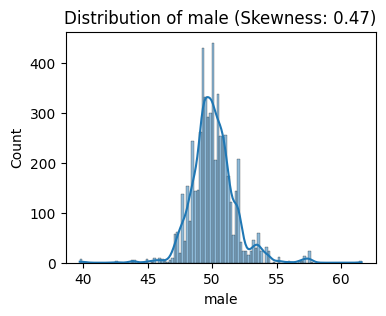

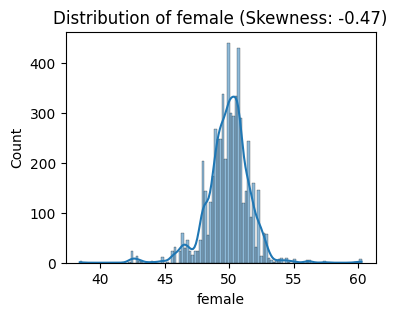

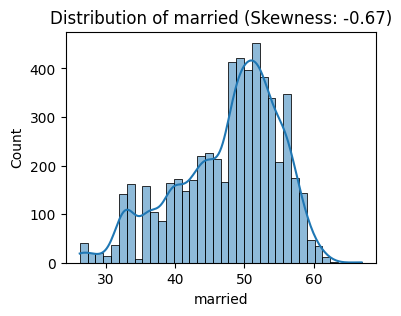

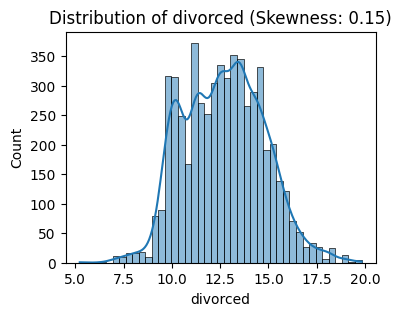

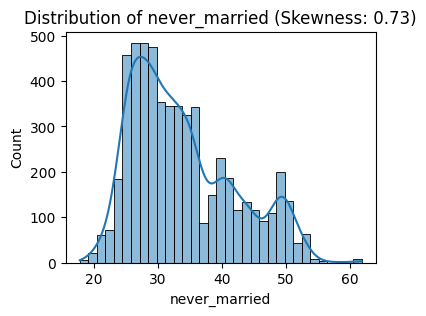

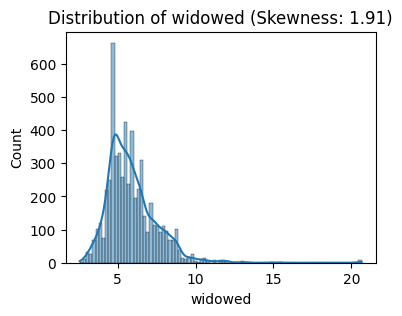

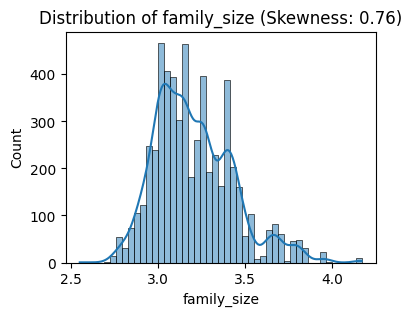

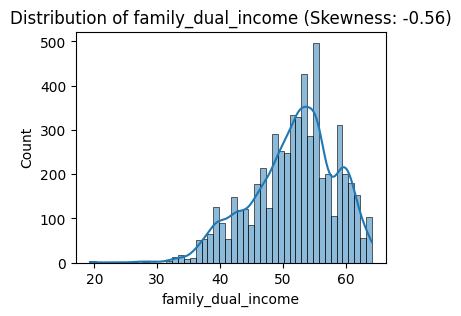

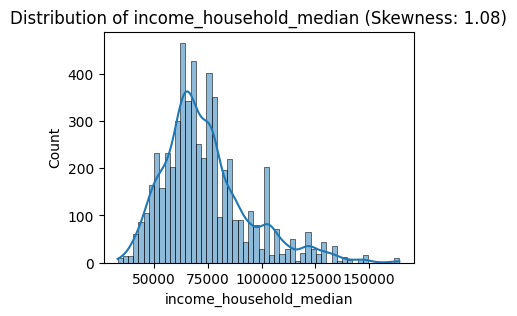

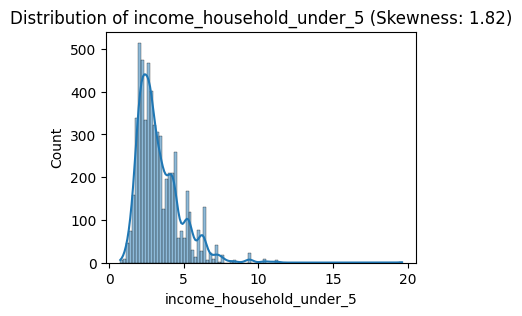

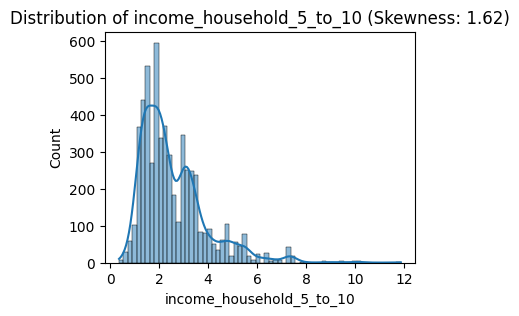

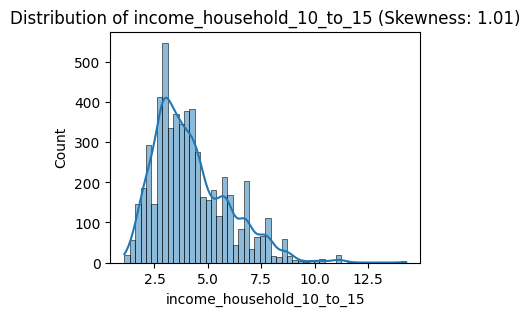

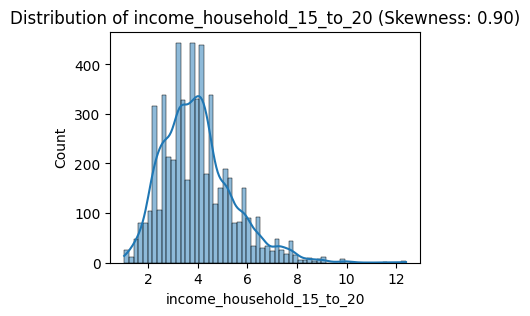

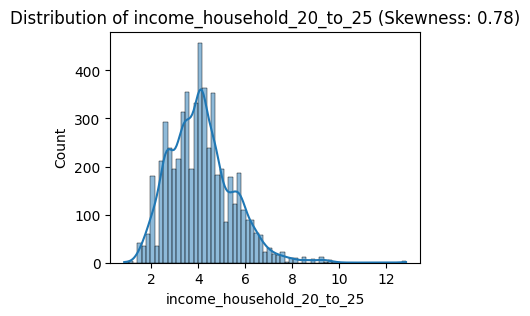

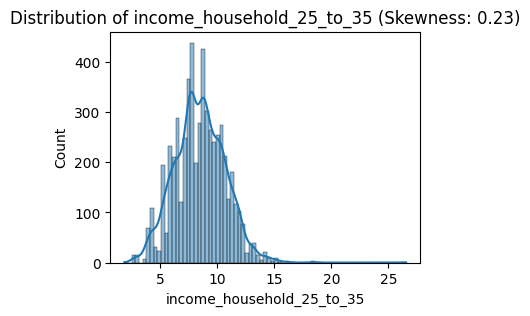

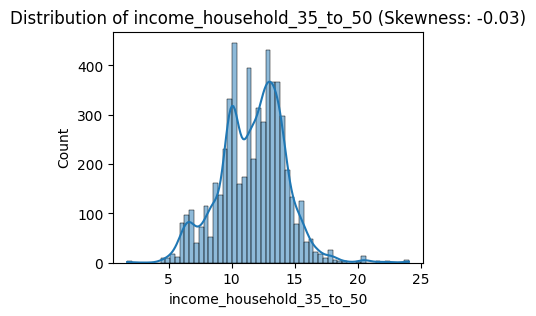

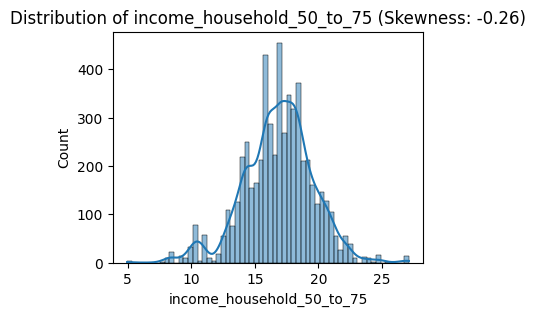

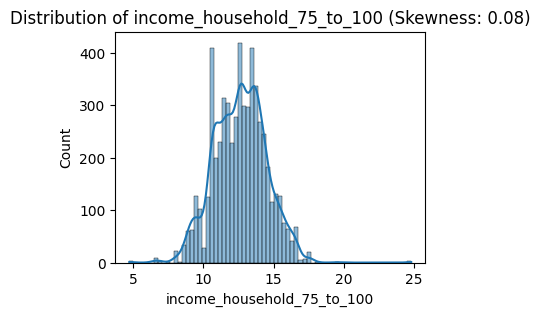

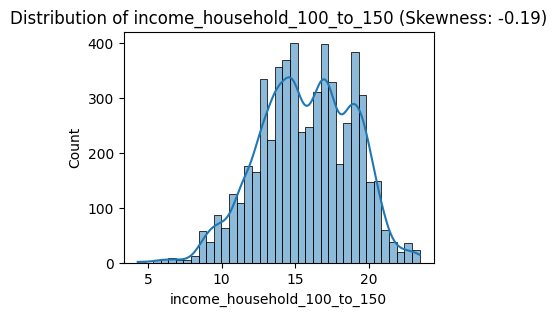

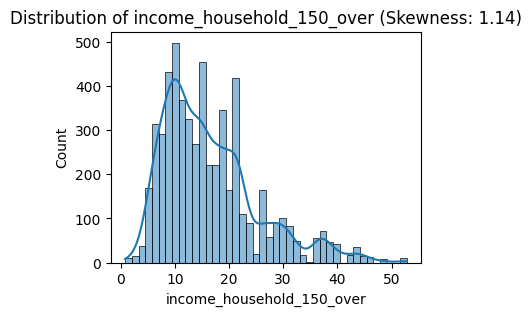

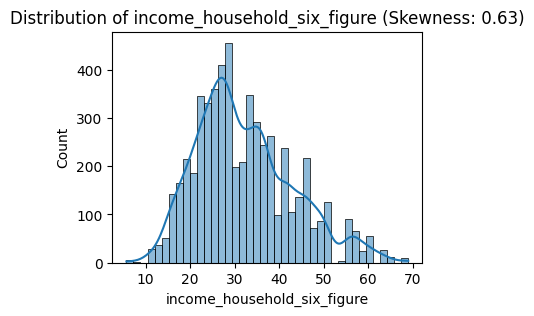

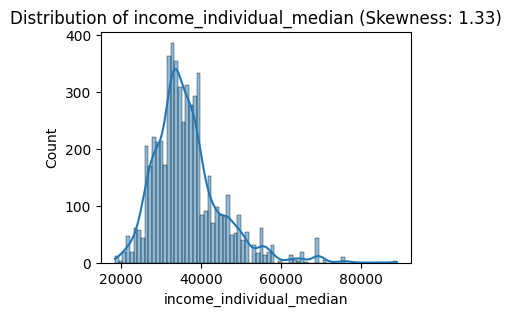

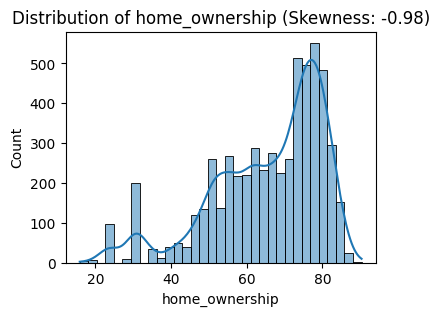

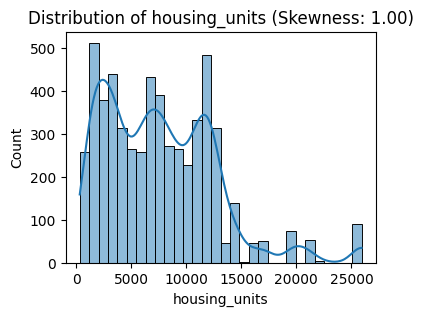

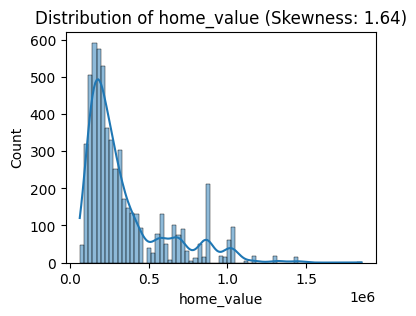

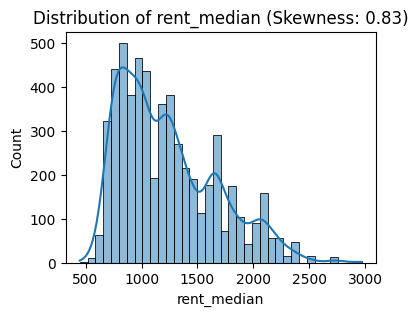

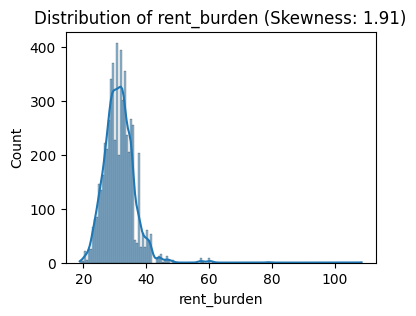

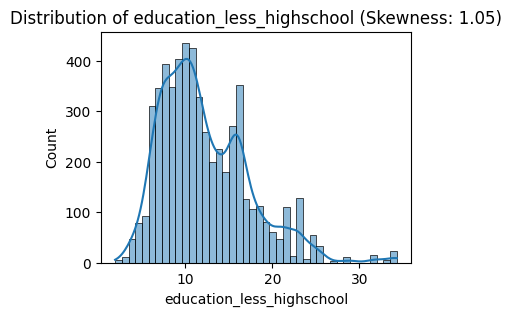

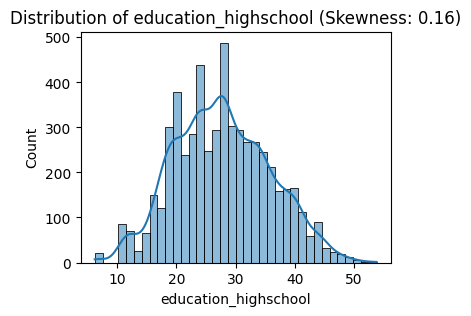

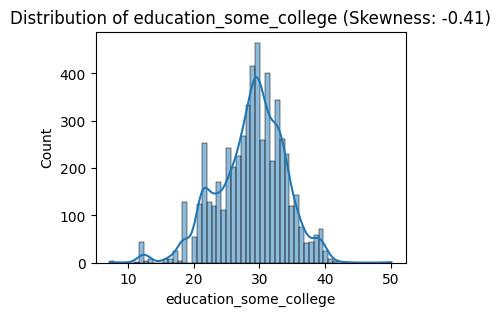

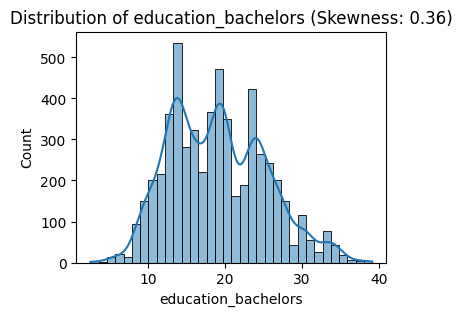

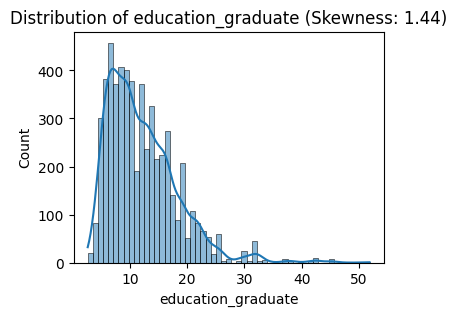

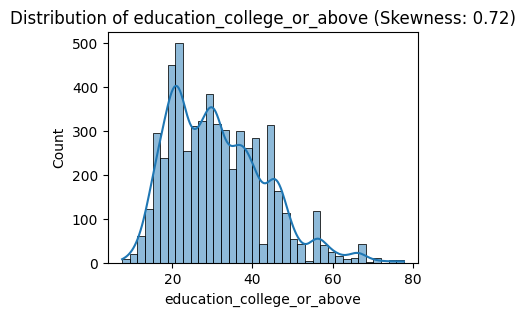

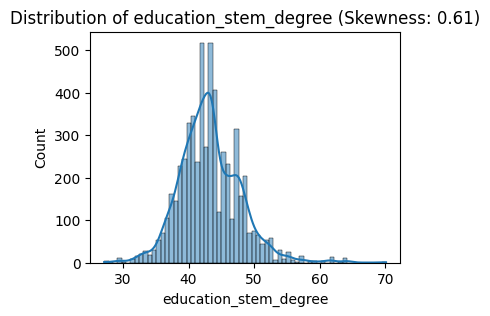

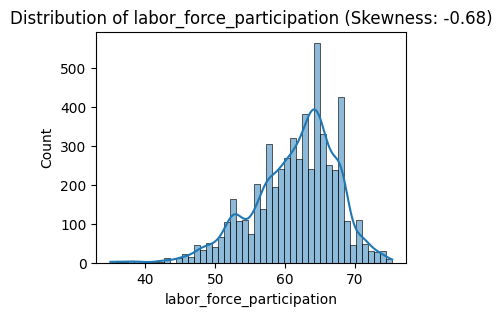

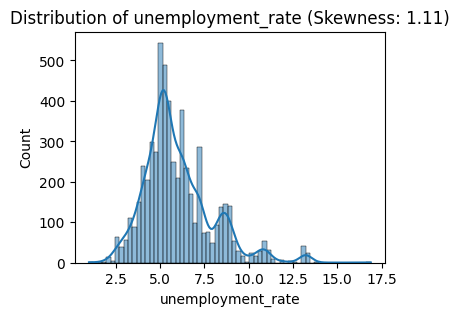

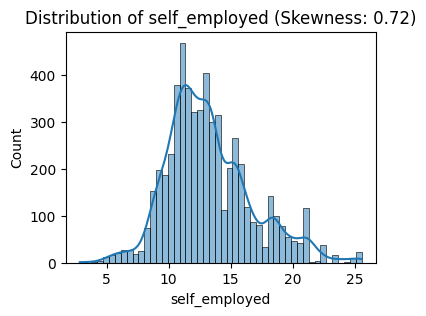

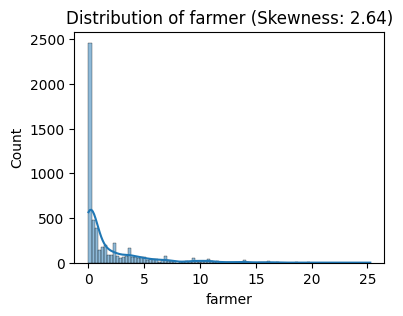

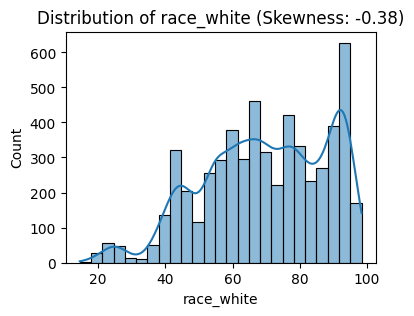

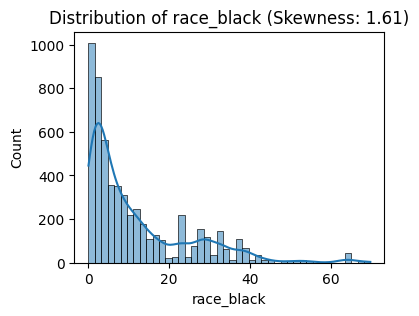

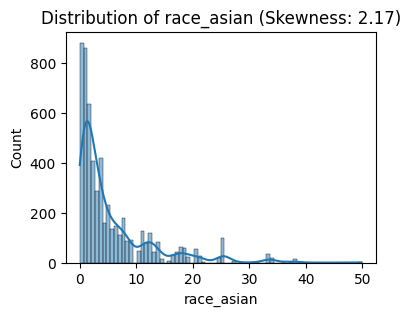

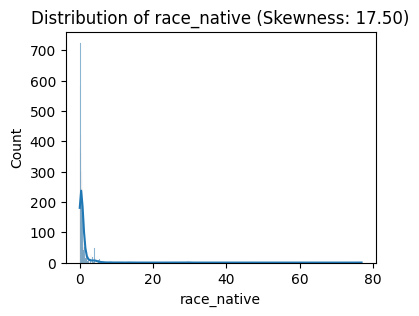

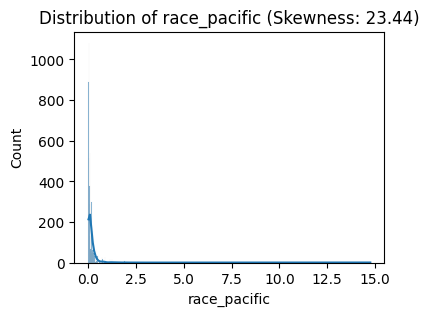

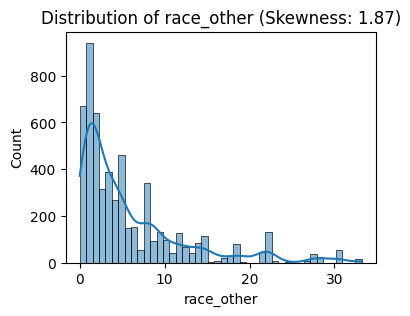

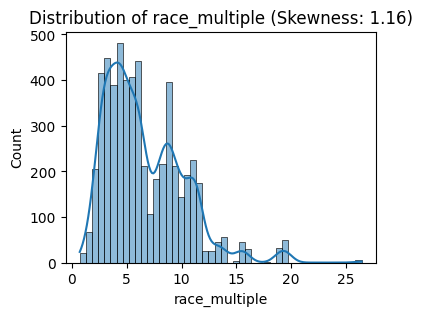

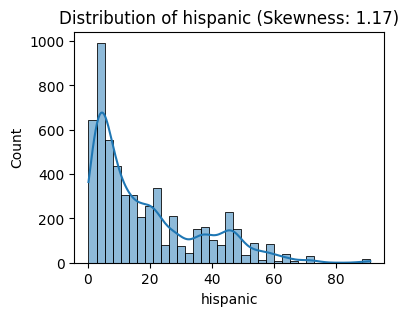

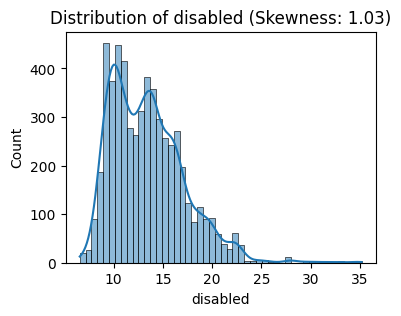

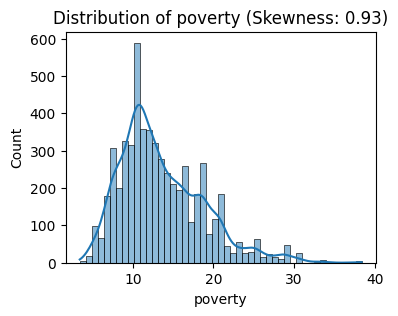

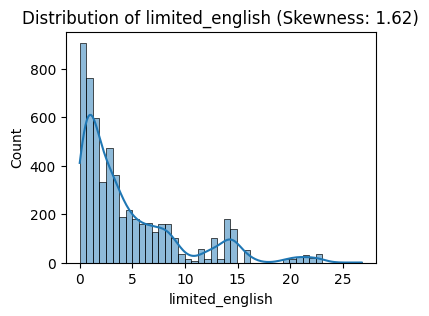

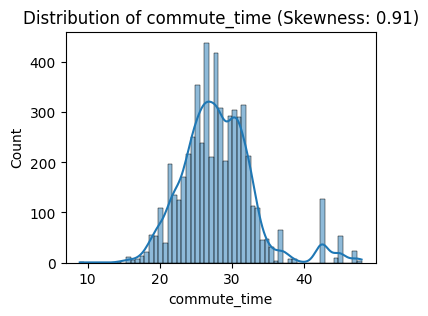

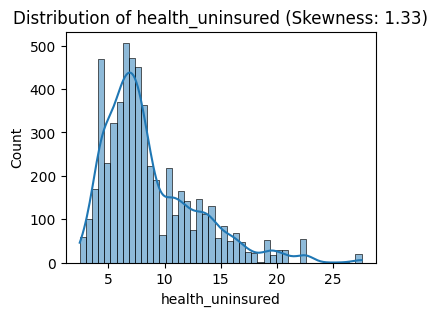

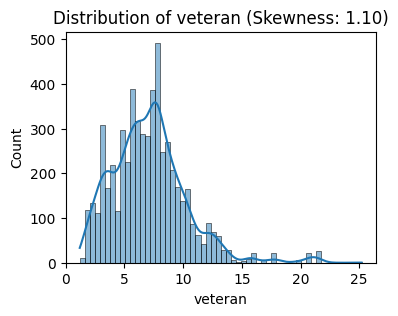

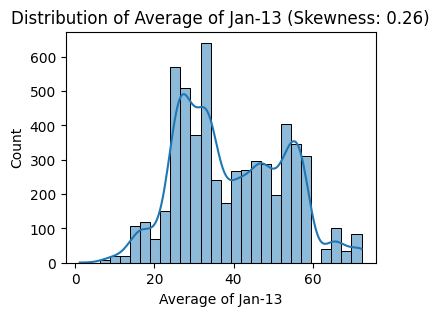

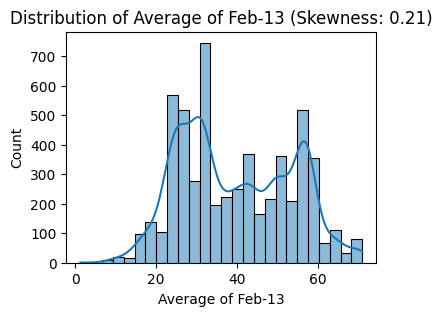

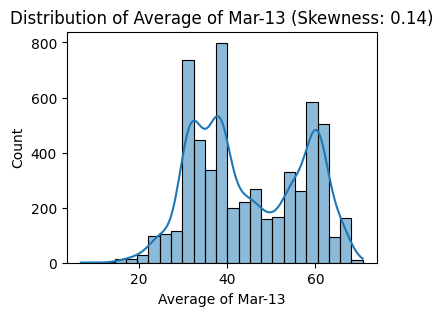

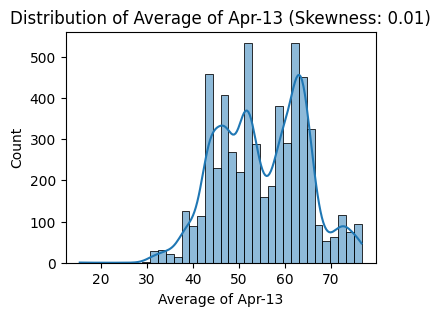

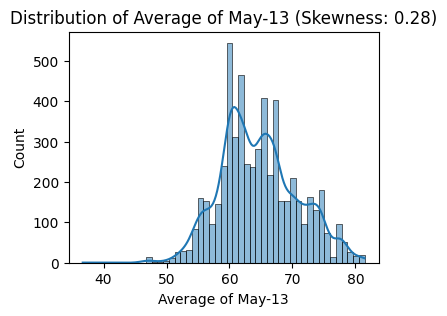

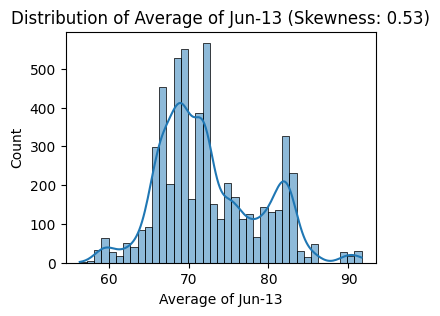

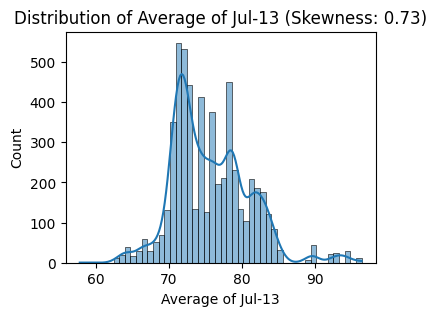

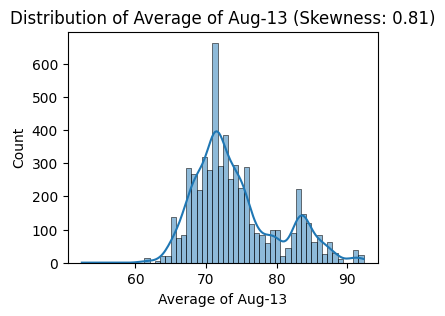

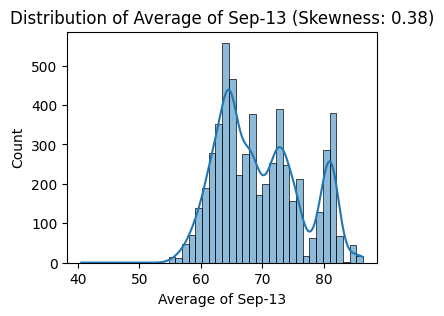

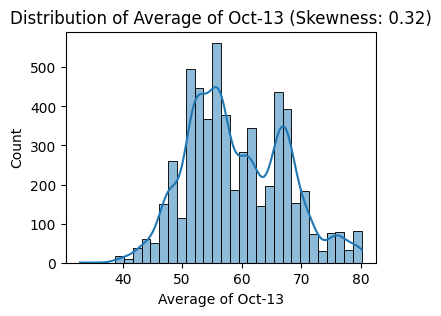

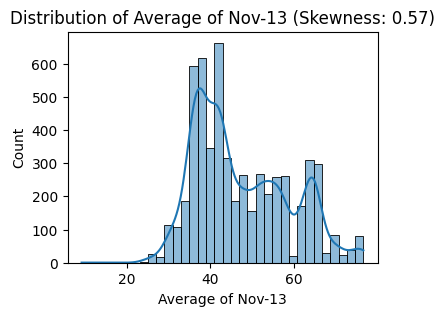

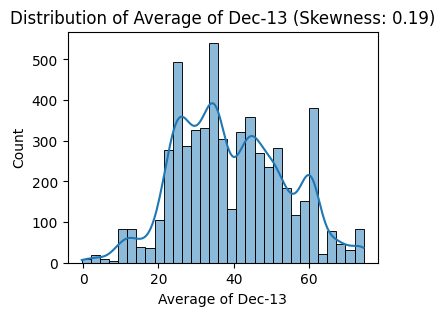

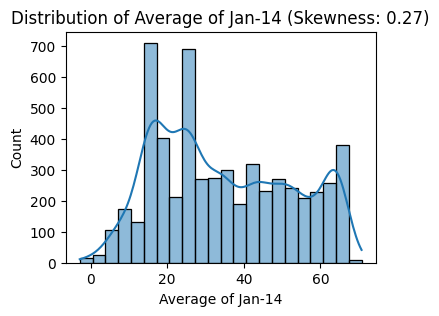

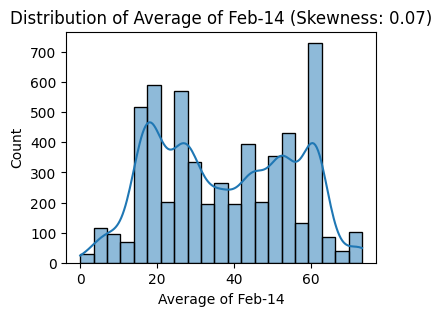

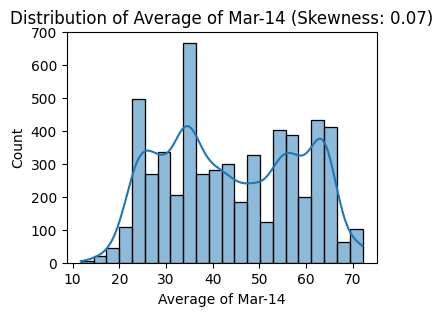

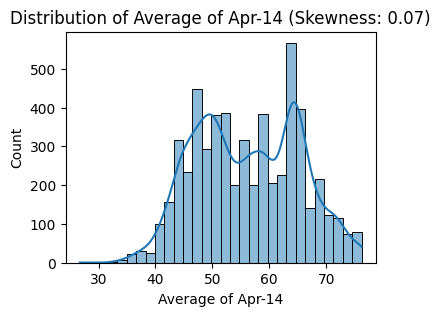

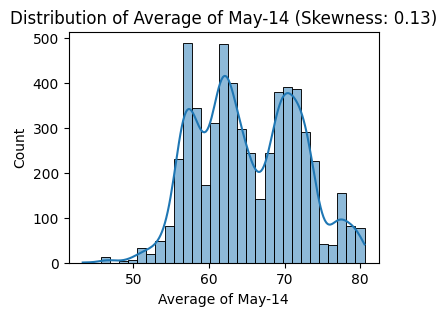

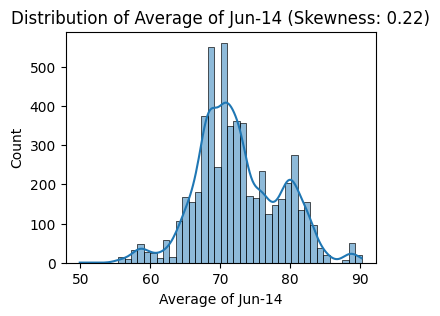

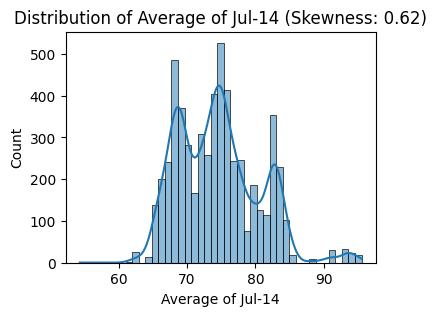

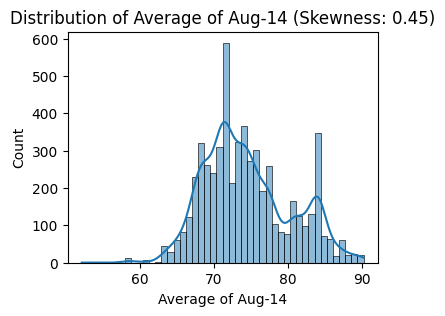

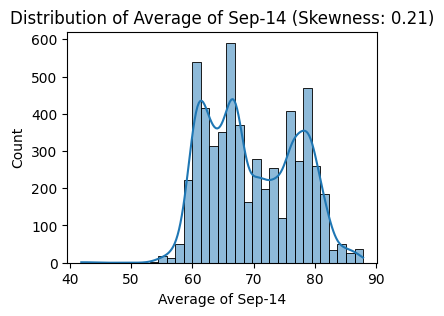

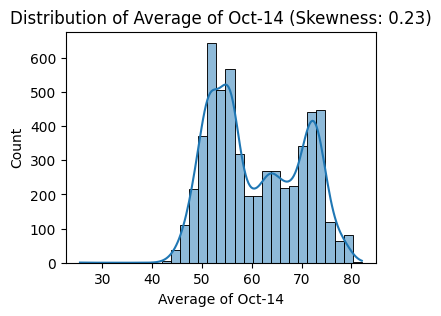

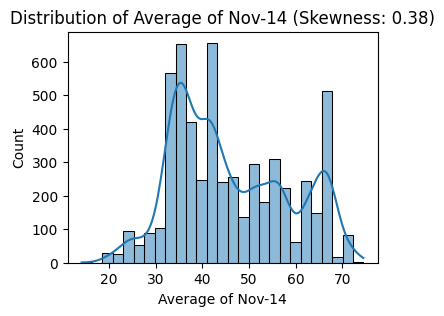

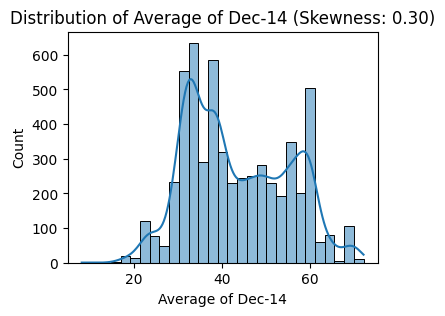

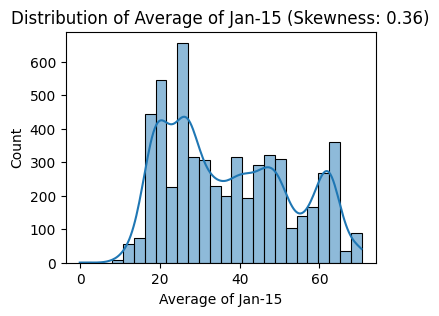

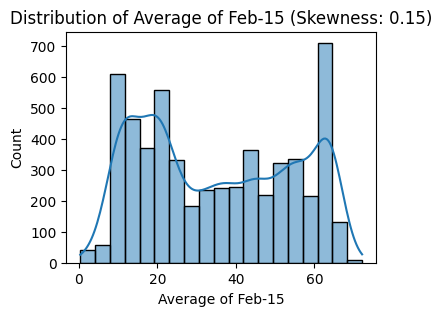

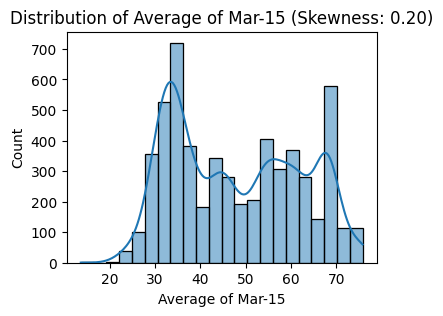

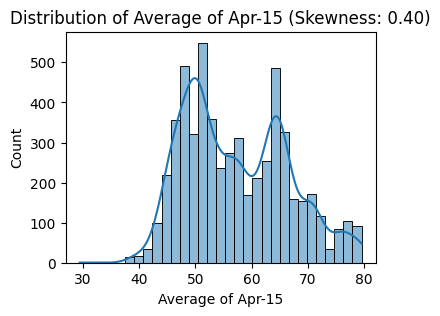

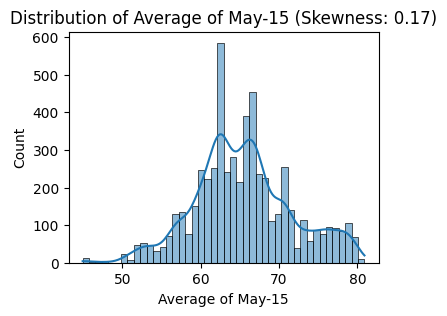

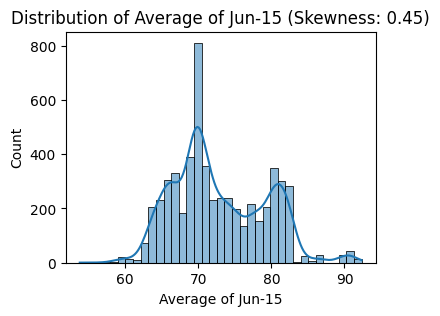

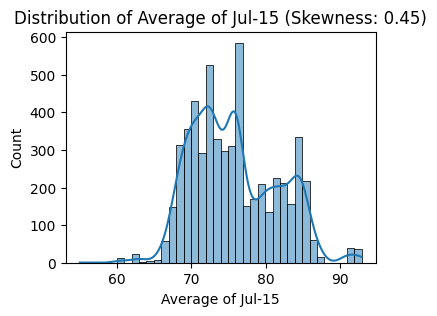

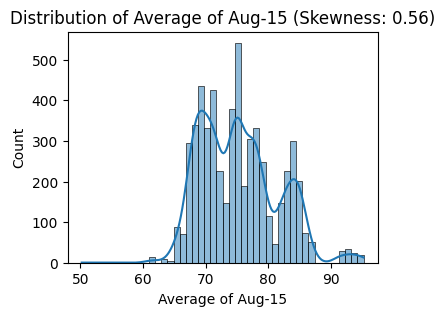

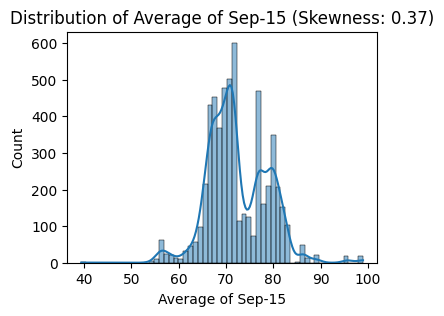

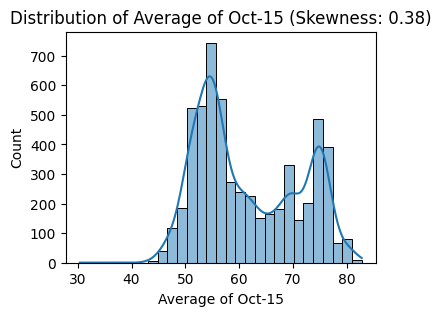

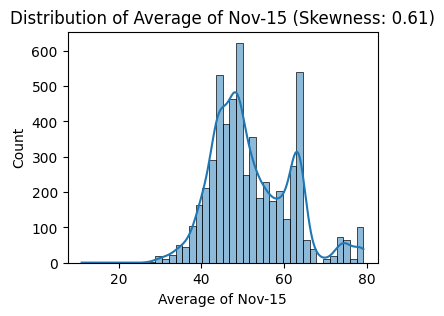

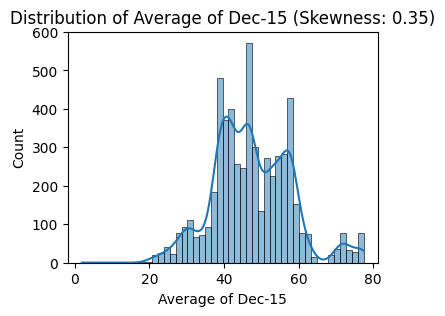

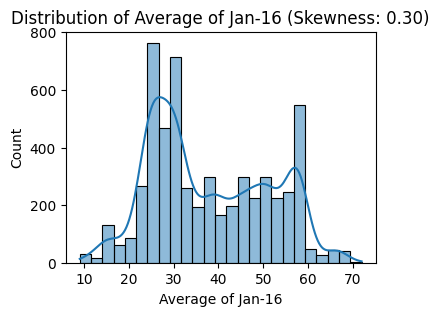

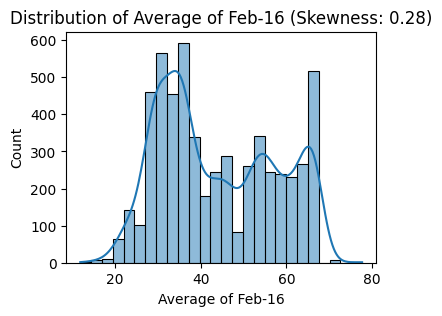

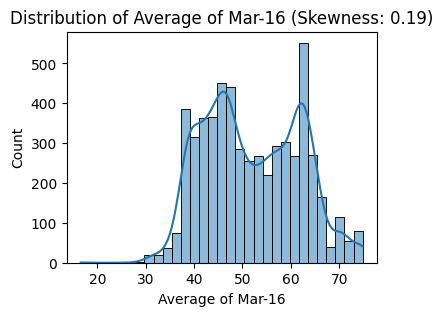

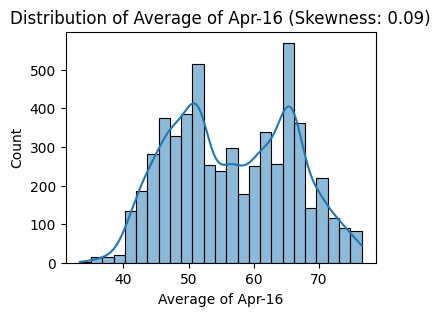

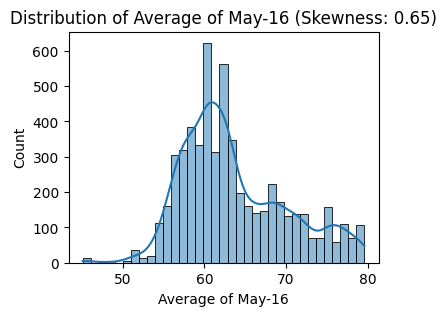

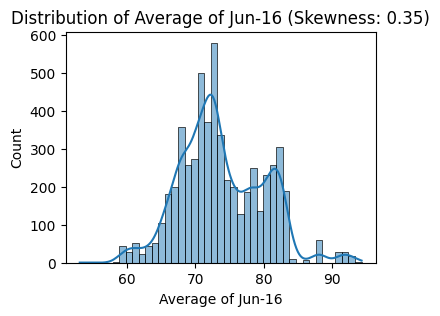

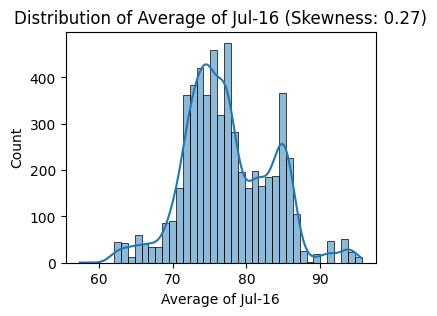

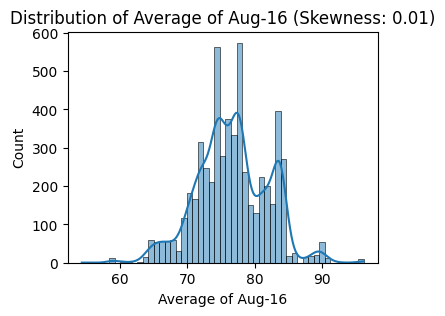

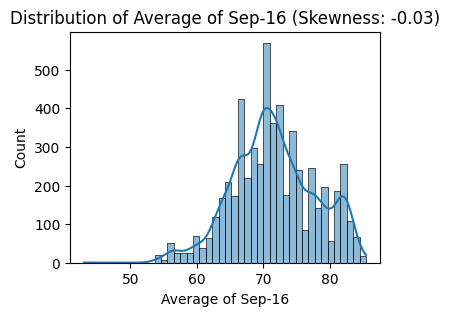

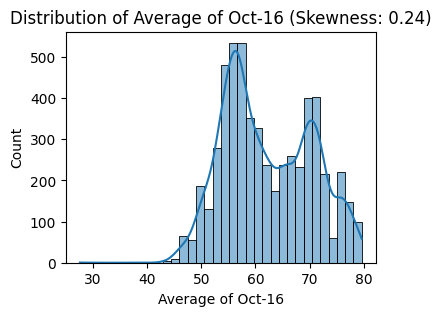

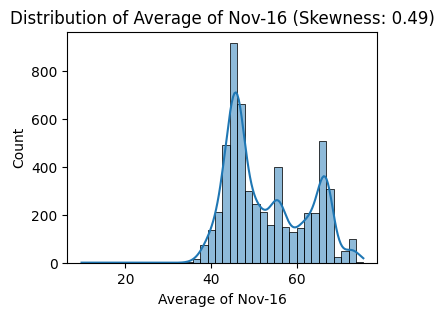

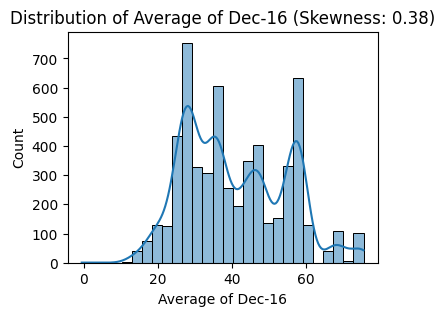

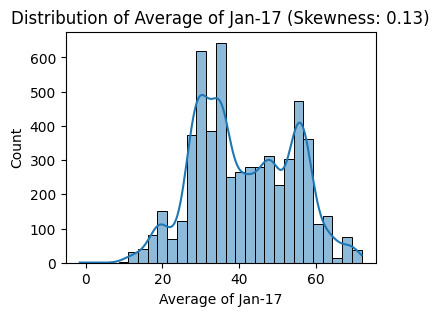

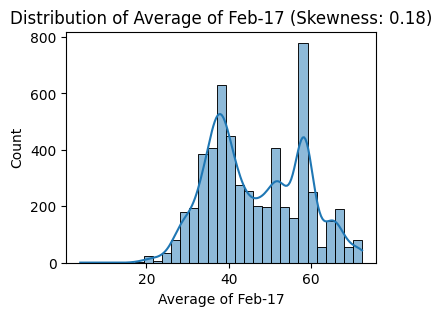

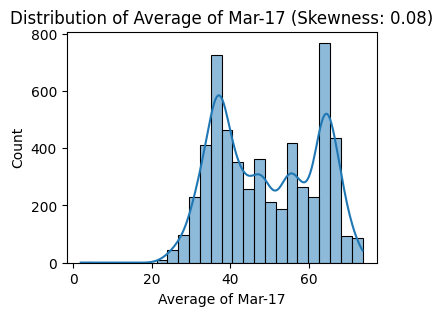

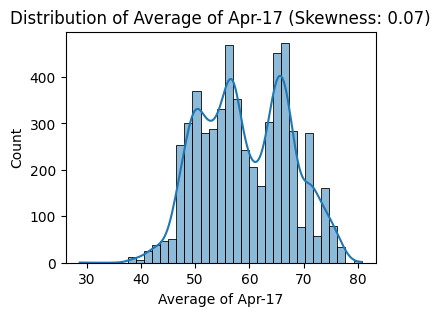

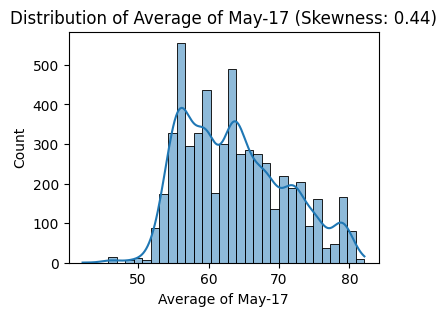

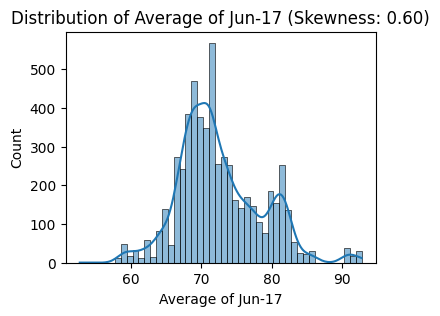

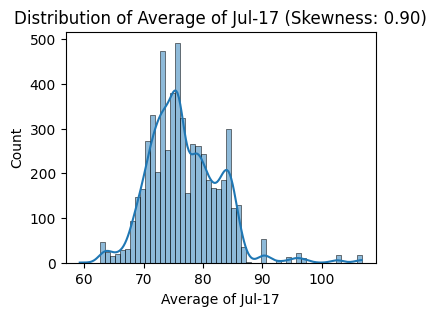

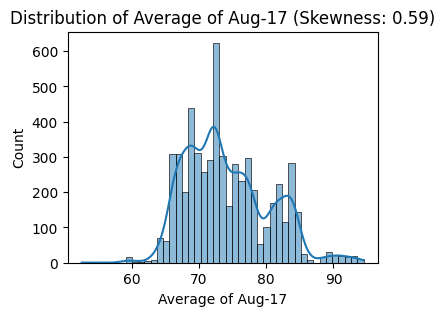

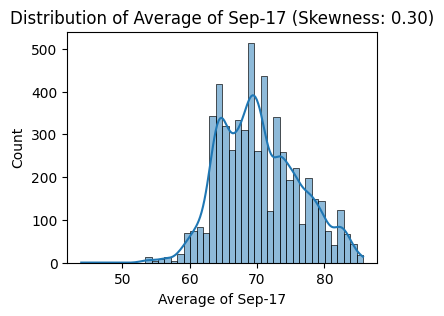

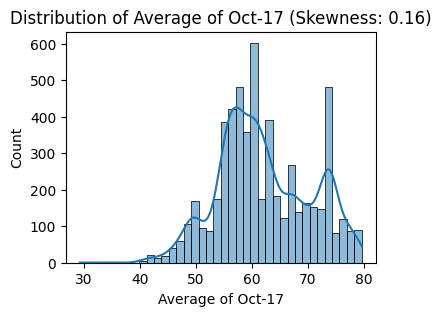

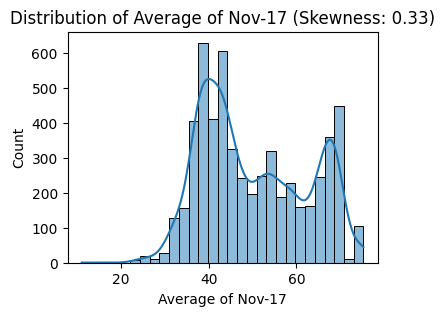

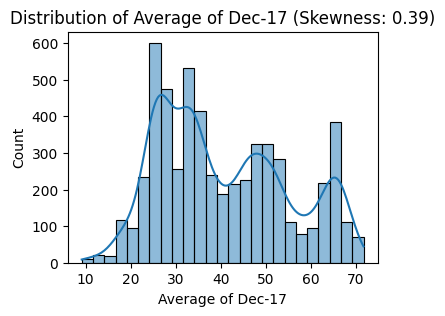

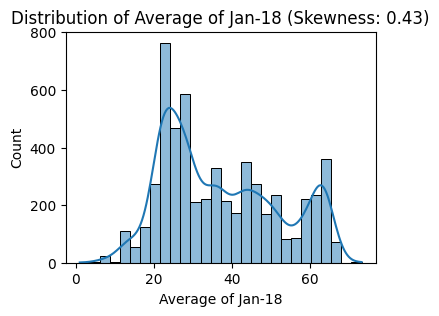

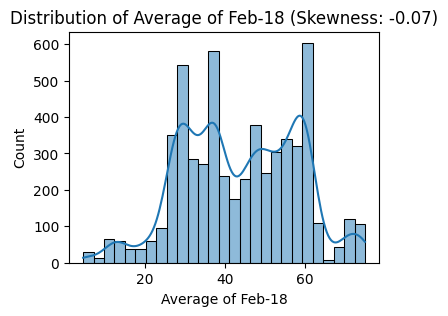

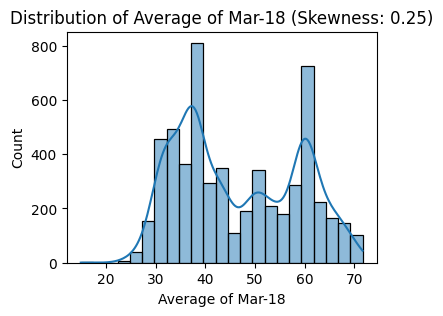

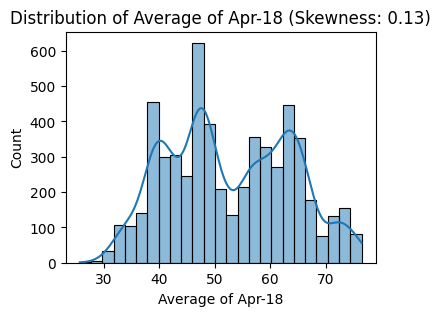

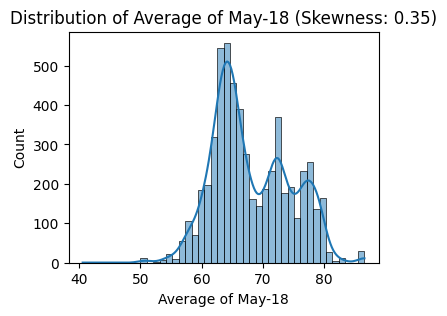

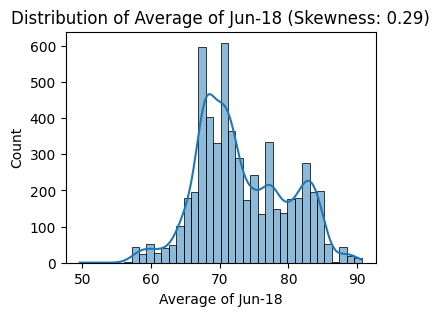

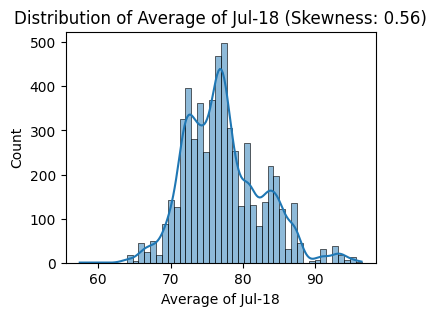

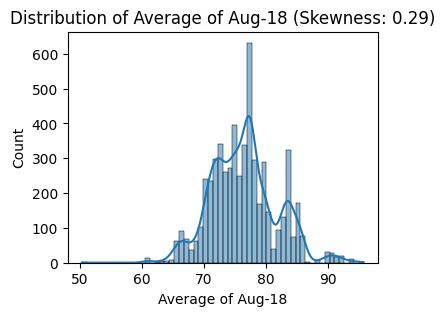

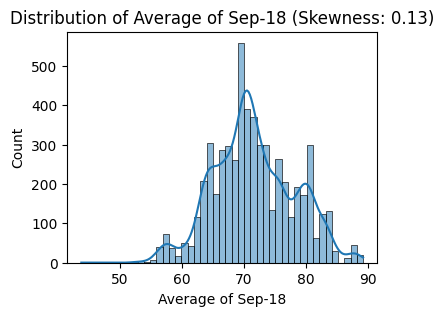

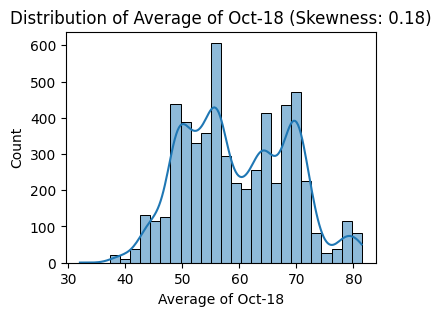

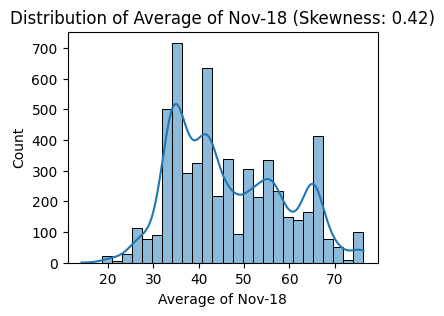

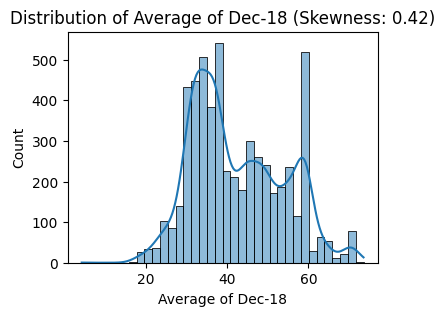

In [13]:
for column in test.columns:
    if pd.api.types.is_numeric_dtype(test[column]):          #checks if datatype of column is numeric
        plt.figure(figsize=(4, 3))
        column_skewness = test[column].skew()
        sns.histplot(test[column].dropna(), kde=True)
        plt.title(f'Distribution of {column} (Skewness: {column_skewness:.2f})')
        plt.show()

# OUTLIER TREATMENT

In [14]:
# Counting the ouliers in each feature
import numpy as np
for column in test.columns:
    if pd.api.types.is_numeric_dtype(test[column]):
        Q1 = df[column].quantile(0.25)
        Q3=df[column].quantile(0.75)
        IQR = Q3-Q1
        lower = Q1-3*IQR
        upper = Q3+3*IQR
        ot_cnt = ((df[column]<lower) | (df[column]>upper)).sum()
        ot_percentage = np.divide(np.multiply(ot_cnt,100),308854)
        ot_round = np.round(ot_percentage,decimals=0)
        print(column," : ",ot_cnt," : ",ot_round,"%")
        

patient_id  :  0  :  0.0 %
patient_zip3  :  0  :  0.0 %
patient_age  :  0  :  0.0 %
bmi  :  0  :  0.0 %
population  :  0  :  0.0 %
density  :  345  :  0.0 %
age_median  :  0  :  0.0 %
age_under_10  :  0  :  0.0 %
age_10_to_19  :  25  :  0.0 %
age_20s  :  16  :  0.0 %
age_30s  :  7  :  0.0 %
age_40s  :  2  :  0.0 %
age_50s  :  2  :  0.0 %
age_60s  :  2  :  0.0 %
age_70s  :  0  :  0.0 %
age_over_80  :  52  :  0.0 %
male  :  66  :  0.0 %
female  :  66  :  0.0 %
married  :  0  :  0.0 %
divorced  :  0  :  0.0 %
never_married  :  0  :  0.0 %
widowed  :  20  :  0.0 %
family_size  :  0  :  0.0 %
family_dual_income  :  3  :  0.0 %
income_household_median  :  10  :  0.0 %
income_household_under_5  :  26  :  0.0 %
income_household_5_to_10  :  17  :  0.0 %
income_household_10_to_15  :  3  :  0.0 %
income_household_15_to_20  :  11  :  0.0 %
income_household_20_to_25  :  4  :  0.0 %
income_household_25_to_35  :  1  :  0.0 %
income_household_35_to_50  :  5  :  0.0 %
income_household_50_to_75  :  3  :

In [15]:
train = train.drop(columns=['patient_race','patient_gender','male','female','married','divorced','never_married','widowed','limited_english','metastatic_first_novel_treatment','metastatic_first_novel_treatment_type','patient_zip3','patient_state','Region','Division','commute_time','family_size','home_ownership','housing_units','home_value','rent_median','rent_burden'])
test = test.drop(columns=['patient_race','patient_gender','male','female','married','divorced','never_married','widowed','limited_english','metastatic_first_novel_treatment','metastatic_first_novel_treatment_type','patient_zip3','patient_state','Region','Division','commute_time','family_size','home_ownership','housing_units','home_value','rent_median','rent_burden'])

In [16]:
categorical_cols = train.select_dtypes(include='object').columns
numerical_cols = train.select_dtypes(include='number').drop(columns=['metastatic_diagnosis_period','patient_id']).columns

# Train and Test data

In [17]:
#x = train.drop(['metastatic_diagnosis_period','patient_id'],axis=1)
#y = train['metastatic_diagnosis_period']
# Check DataFrame columns
print(train.columns)

# Drop 'patient_id' and 'metastatic_diagnosis_period' columns
X = train.drop(['metastatic_diagnosis_period','patient_id'],axis=1)
y = train['metastatic_diagnosis_period']


Index(['patient_id', 'payer_type', 'patient_age', 'bmi',
       'breast_cancer_diagnosis_code', 'breast_cancer_diagnosis_desc',
       'metastatic_cancer_diagnosis_code', 'population', 'density',
       'age_median',
       ...
       'Average of Apr-18', 'Average of May-18', 'Average of Jun-18',
       'Average of Jul-18', 'Average of Aug-18', 'Average of Sep-18',
       'Average of Oct-18', 'Average of Nov-18', 'Average of Dec-18',
       'metastatic_diagnosis_period'],
      dtype='object', length=130)


In [18]:
X.shape

(13173, 128)

In [19]:
# Assuming you have a DataFrame called 'data' with features and target variable
# 'target_column' represents the name of your target variable column

# Define X (features) and y (target)
#X = data.drop(columns=['target_column'])  # Drop the target column to get the features
#y = data['target_column']  # Select only the target column

# Now you can split your data into training and testing sets
#from sklearn.model_selection import train_test_split
#x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)


# Scaling

In [20]:

#Seperating the numerical and the  categorical data
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Identify numerical and categorical features
numeric_features = X_train.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X_train.select_dtypes(include=['object']).columns

# Define preprocessing steps
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features)])

# Apply preprocessing
X_train_scaled = preprocessor.fit_transform(X_train)
X_test_scaled = preprocessor.transform(X_test)


In [21]:
#feature scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train_scaled)
X_test = sc.transform(X_test_scaled)

# Models

In [22]:
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LinearRegression, RidgeCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import pandas as pd

# Separate features and target
X = train.drop(['metastatic_diagnosis_period', 'patient_id'], axis=1)
y = train['metastatic_diagnosis_period']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define numeric and categorical features
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object']).columns

# Define preprocessing for numeric features
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())])

# Define preprocessing for categorical features
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

# Combine preprocessing for numeric and categorical features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

# Define the models
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": RidgeCV(),
    "Random Forest Regression": RandomForestRegressor()
}

# Store the results
results = {}

# Train and evaluate each model
for name, model in models.items():
    # Create a pipeline with preprocessing and the current model
    pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                               ('model', model)])
    
    # Train the model
    pipeline.fit(X_train, y_train)
    
    # Predict on the test data
    y_pred = pipeline.predict(X_test)
    
    # Evaluate the model
    accuracy = mean_squared_error(y_test, y_pred, squared=False)
    print(f"Root Mean Squared Error ({name}):", accuracy)
    
    # Store the accuracy
    results[name] = accuracy

# Convert results to DataFrame
results_df = pd.DataFrame(results.items(), columns=['Model', 'Accuracy'])
print(results_df)


Root Mean Squared Error (Linear Regression): 82.94354297530006
Root Mean Squared Error (Ridge Regression): 82.8158815599867
Root Mean Squared Error (Random Forest Regression): 87.56001371050895
                      Model   Accuracy
0         Linear Regression  82.943543
1          Ridge Regression  82.815882
2  Random Forest Regression  87.560014


In [23]:
print(results_df.sort_values(by='Accuracy',ascending=True))

                      Model   Accuracy
1          Ridge Regression  82.815882
0         Linear Regression  82.943543
2  Random Forest Regression  87.560014


# Prediction on test data

In [24]:
test1 = test.drop('patient_id',axis=1)

In [25]:
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import RidgeCV
from sklearn.metrics import mean_squared_error
import pandas as pd
from sklearn.model_selection import train_test_split

# Separate features and target
X = train.drop(['metastatic_diagnosis_period', 'patient_id'], axis=1)
y = train['metastatic_diagnosis_period']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define numeric and categorical features
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object']).columns

# Define preprocessing for numeric features
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())])

# Define preprocessing for categorical features
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

# Combine preprocessing for numeric and categorical features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

# Create a pipeline with preprocessing and RidgeCV model
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('model', RidgeCV())])

# Fit the pipeline on training data
pipeline.fit(X_train, y_train)

# Predict on the test data
y_pred = pipeline.predict(X_test)

# Evaluate the model
accuracy = mean_squared_error(y_test, y_pred, squared=False)
print("Root Mean Squared Error (RidgeCV):", accuracy)

# Make predictions on new data (if needed)
test_data = pd.read_csv(r"/kaggle/input/widsdatathon2024-challenge2/test.csv")  
predictions = pipeline.predict(test_data)
print(predictions)


Root Mean Squared Error (RidgeCV): 82.8158815599867
[228.52609701  79.63637902 208.83876025 ... 202.63035505  71.85163457
  46.81693354]


# Submission of Results

In [26]:
import numpy as np
submit_predict = pd.read_csv(r"/kaggle/input/widsdatathon2024-challenge2/solution_template.csv")
submit_predict['metastatic_diagnosis_period'] = np.rint(predictions)
submit_predict.to_csv('submission_results.csv',index=False)
submit_predict.head()

patient_id  metastatic_diagnosis_period
0      730681                        229.0
1      334212                         80.0
2      571362                        209.0
3      907331                        208.0
4      208382                         55.0

In [27]:
submit_predict

patient_id  metastatic_diagnosis_period
0         730681                        229.0
1         334212                         80.0
2         571362                        209.0
3         907331                        208.0
4         208382                         55.0
...          ...                          ...
5641      649011                         53.0
5642      869024                         82.0
5643      304800                        203.0
5644      267406                         72.0
5645      873886                         47.0

[5646 rows x 2 columns]